# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Eric Possato</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

## Instruções

Nesta prova vamos trabalhar com um dataset de tipos de florestamento de acordo com características do terreno e de suas cercanias.

As questões estão distribuidas ao longo do notebook, procure pela tag "**QUESTÕES**". Temos 7 questões ao todo.

Boa prova!

***

# **QUESTÕES**

***Questão 1*** (2,0 pt)

Em ciência devemos sempre tomar muito cuidado para não "overfittar" os fenômenos da natureza que estamos observando. Ou seja: devemos construir mecanismos de explicação (leis naturais) dos fenômenos que permitem reproduzir os resultados observados, e também permitem PREVER corretamente resultados para novas situações.

Nesta questão você deverá relacionar seu conhecimento de *machine learning* a este panorama da ciência.

a) (0.5 pts) Um cientista verifica que a lei natural que ela/ele postulou se ajusta muito bem ao conjunto completo de dados do seu experimento, e já declara que sua teoria é válida. Um especialista em machine learning diz que o cientista não pode afirmar isso ainda. Por que o especialista em machine learning diz isso? Explique. Construa uma sugestão que o especialista em machine learning pode fazer ao cientista para ajudá-lo a ter mais certeza sobre a validade de sua lei natural.

c) (0.5 pts) A qual etapa do processo "CRISP-DM" corresponde o "brainstorming" sobre boas ideias sobre leis naturais que possam explicar o experimento?

d) (0.5 pts) A qual etapa do processo de machine learning (nivel 2 / nivel 1 / nivel 0) corresponde o processo de escolher uma lei natural dentre um conjunto de opções de leis inventadas no item anterior?

e) (0.5 pts) Em ciência, o que é o "deploy"?

***Resposta***:



a) O especialista em machine learning enxerga a possibilidade de que a lei natural postulada pelo cientista pode ter sido muito influênciada pelas condições determinadas pelo conjunto de dados do experimento, isto significa que, é possível que a lei possa não ser geral o suficiente para descrever ou prever fenômenos que se distanciam dos dados do experimento. Em outras palavras existe a possibilidade da lei estar "overfittada".

Para verificar a validade da lei natural postulada, seria importante testar o seu funcionamento em dados novos, separados dos dados originais do experimento. Caso o comportamento neste novo conjunto seja adequado, indicaria a possibilidade de prever resultados para novas situações e aumentaria a certeza sobre a validade da lei natural.

c) Como o experimento já foi feito e a tarefa é gerar ideias de leis naturais para explicá-lo, uma correspondência à esse "brainstorming" no processo "CRISP-DM" seria a etapa de modeling. Mais especificamente, seria o processo de selecionar alguma técnica de modelagem adequada ao conjunto de dados otidos, ou, na situação científica, propor uma lei natural adequada ao experimento.

d) Escolher uma lei natural dentre um conjunto proposto seria similar ao processo de certificação do "CRISP-DM", selecionando um modelo/lei para uma avaliação mais minuciosa, revisão do processo e planejamento de passos futuros. Este processo corresponde ao nível 1 do processo de machine learning

e) Na ciência, publicar um artigo científico demonstrando a lei natural e como ela é aplicada é similar a colocar um modelo em circulação, ou seja, fazer "deploy"

***

Para as questões a seguir vamos trabalhar com o *dataset* *"Forest Cover Types"* (https://archive.ics.uci.edu/dataset/31/covertype). O *dataset* contém as seguintes *features*, de acordo com a documentação do *site*:

| Name                               | Data Type    | Measurement                 | Description                                   |
|------------------------------------|--------------|-----------------------------|-----------------------------------------------|
| Elevation                          | quantitative | meters                      | Elevation in meters                           |
| Aspect                             | quantitative | azimuth                     | Aspect in degrees azimuth                     |
| Slope                              | quantitative | degrees                     | Slope in degrees                              |
| Horizontal_Distance_To_Hydrology   | quantitative | meters                      | Horz Dist to nearest surface water features   |
| Vertical_Distance_To_Hydrology     | quantitative | meters                      | Vert Dist to nearest surface water features   |
| Horizontal_Distance_To_Roadways    | quantitative | meters                      | Horz Dist to nearest roadway                  |
| Hillshade_9am                      | quantitative | 0 to 255 index              | Hillshade index at 9am, summer solstice       |
| Hillshade_Noon                     | quantitative | 0 to 255 index              | Hillshade index at noon, summer soltice       |
| Hillshade_3pm                      | quantitative | 0 to 255 index              | Hillshade index at 3pm, summer solstice       |
| Horizontal_Distance_To_Fire_Points | quantitative | meters                      | Horz Dist to nearest wildfire ignition points |
| Wilderness_Area (4 binary columns) | qualitative  | 0 (absence) or 1 (presence) | Wilderness area designation                   |
| Soil_Type (40 binary columns)      | qualitative  | 0 (absence) or 1 (presence) | Soil Type designation                         |
| Cover_Type (7 types)               | integer      | 1 to 7                      | Forest Cover Type designation                 |

No *dataset* original, as colunas cujo nome inicia com `Wilderness_Area`, `Soil_Type` e `Cover_Type` são colunas binárias, pois já correspondem ao "one-hot-encoding" das características subjacentes. As demais colunas são quantitativas (numéricas).

No código do arquivo `utils.py` já temos a leitura do *dataset* e a separação treino-teste. Estes códigos utilitários estão em um arquivo separado apenas para não poluir este notebook, só isso.

Na leitura de dados as colunas binárias foram convertidas de volta para variáveis categóricas.

A análise exploratória também foi (muito mal) feita, mas é a vida: nem sempre temos bons colaboradores entregando material de qualidade para a gente continuar o trabalho, ora!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import (analise_descritiva_preliminar, load_dataset, split_data,
                   visualizacao_posterior, visualizacao_preliminar)

In [2]:
data = load_dataset()
train_data, test_data = split_data(data)

### Numero de linhas e colunas

(581012, 13)

### Primeiras linhas do dataset

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3078.0    25.0   13.0                             256.0   
1     2916.0   261.0   18.0                             268.0   
2     3253.0   154.0   19.0                             335.0   
3     3068.0   184.0   13.0                             240.0   
4     3011.0    86.0   10.0                             240.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                            61.0                           1396.0   
1                            20.0                           5744.0   
2                            39.0                            825.0   
3                            13.0                            977.0   
4                            36.0                           4231.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          213.0           212.0          133.0   
1          172.0           247.0          211.0   
2          239.0           238.0          121.0   
3          222.0           248.0          157.0   
4          235.0           223.0          119.0   

   Horizontal_Distance_To_Fire_Points      Cover_Type Soil_Type  \
0                              2877.0      Spruce/Fir        30   
1                              6323.0      Spruce/Fir        28   
2                              2489.0  Lodgepole Pine        12   
3                              3064.0      Spruce/Fir        32   
4                              5131.0  Lodgepole Pine        28   

  Wilderness_Area  
0               2  
1               0  
2               2  
3               2  
4               0

### Tipos de dados de cada coluna

Elevation                              float64
Aspect                                 float64
Slope                                  float64
Horizontal_Distance_To_Hydrology       float64
Vertical_Distance_To_Hydrology         float64
Horizontal_Distance_To_Roadways        float64
Hillshade_9am                          float64
Hillshade_Noon                         float64
Hillshade_3pm                          float64
Horizontal_Distance_To_Fire_Points     float64
Cover_Type                            category
Soil_Type                             category
Wilderness_Area                       category
dtype: object

### Numero de valores faltantes em cada coluna

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Soil_Type                             0
Wilderness_Area                       0
dtype: int64

### Contagens de valores unicos em cada coluna categorica

Cover_Type
Lodgepole Pine       283301
Spruce/Fir           211840
Ponderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: count, dtype: int64

Soil_Type
28    115247
22     57752
31     52519
32     45154
21     33373
9      32634
29     30170
11     29971
30     25666
23     21278
12     17431
37     15573
38     13806
10     12410
3      12396
19      9259
39      8750
1       7525
5       6575
2       4823
18      4021
16      3422
0       3031
15      2845
25      2589
17      1899
34      1891
33      1611
4       1597
8       1147
26      1086
27       946
20       838
13       599
24       474
36       298
7        179
35       119
6        105
14         3
Name: count, dtype: int64

Wilderness_Area
0    260796
2    253364
3     36968
1     29884
Name: count, dtype: int64

count     mean      std     min  \
Elevation                           581012.0  2959.37   279.98  1859.0   
Aspect                              581012.0   155.66   111.91     0.0   
Slope                               581012.0    14.10     7.49     0.0   
Horizontal_Distance_To_Hydrology    581012.0   269.43   212.55     0.0   
Vertical_Distance_To_Hydrology      581012.0    46.42    58.30  -173.0   
Horizontal_Distance_To_Roadways     581012.0  2350.15  1559.25     0.0   
Hillshade_9am                       581012.0   212.15    26.77     0.0   
Hillshade_Noon                      581012.0   223.32    19.77     0.0   
Hillshade_3pm                       581012.0   142.53    38.27     0.0   
Horizontal_Distance_To_Fire_Points  581012.0  1980.29  1324.20     0.0   

                                       25%     50%     75%     max  
Elevation                           2809.0  2996.0  3163.0  3858.0  
Aspect                                58.0   127.0   260.0   360.0  
Slope                                  9.0    13.0    18.0    66.0  
Horizontal_Distance_To_Hydrology     108.0   218.0   384.0  1397.0  
Vertical_Distance_To_Hydrology         7.0    30.0    69.0   601.0  
Horizontal_Distance_To_Roadways     1106.0  1997.0  3328.0  7117.0  
Hillshade_9am                        198.0   218.0   231.0   254.0  
Hillshade_Noon                       213.0   226.0   237.0   254.0  
Hillshade_3pm                        119.0   143.0   168.0   254.0  
Horizontal_Distance_To_Fire_Points  1024.0  1710.0  2550.0  7173.0

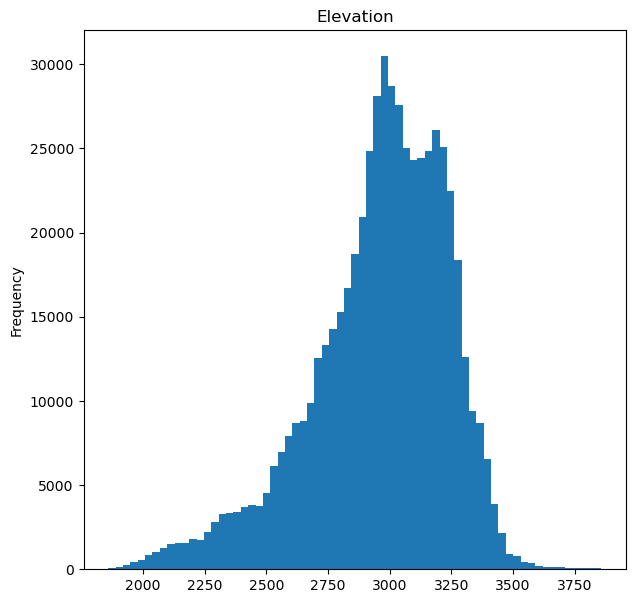

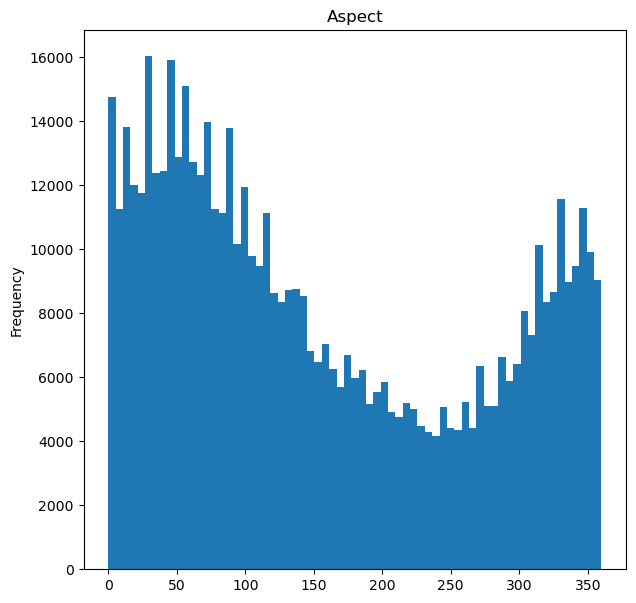

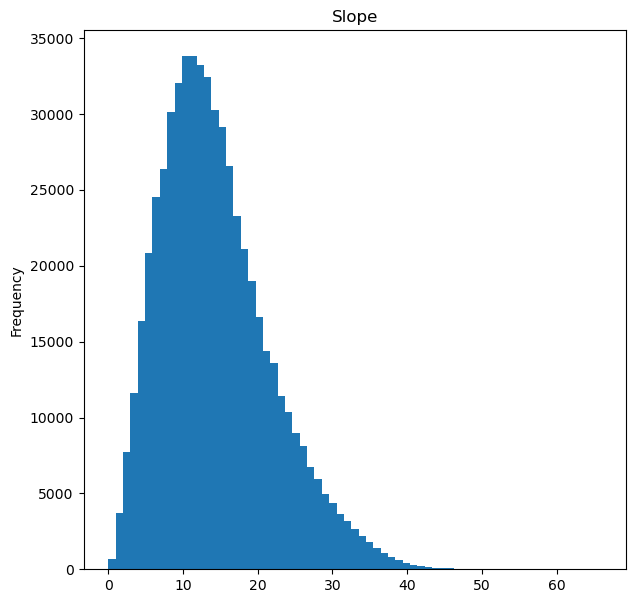

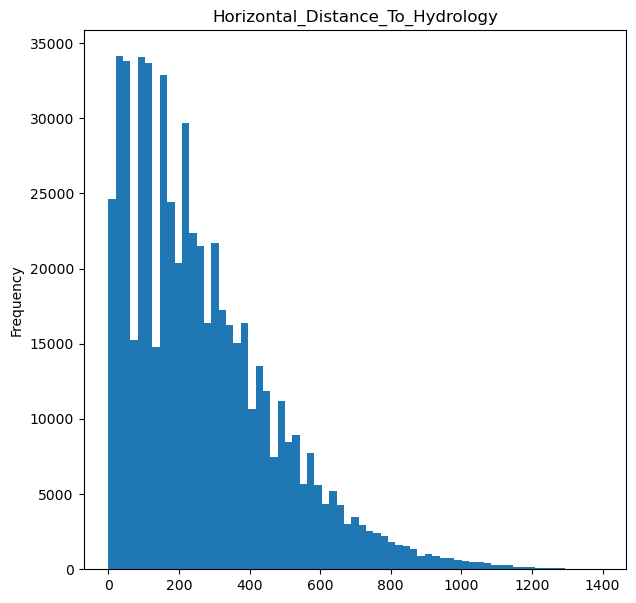

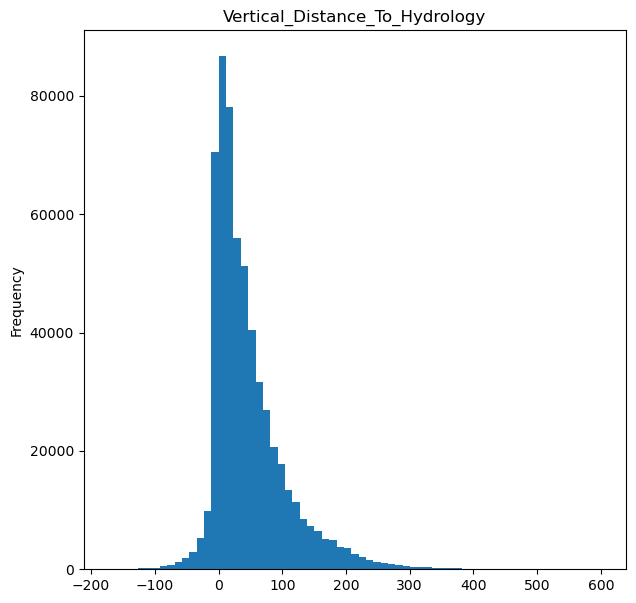

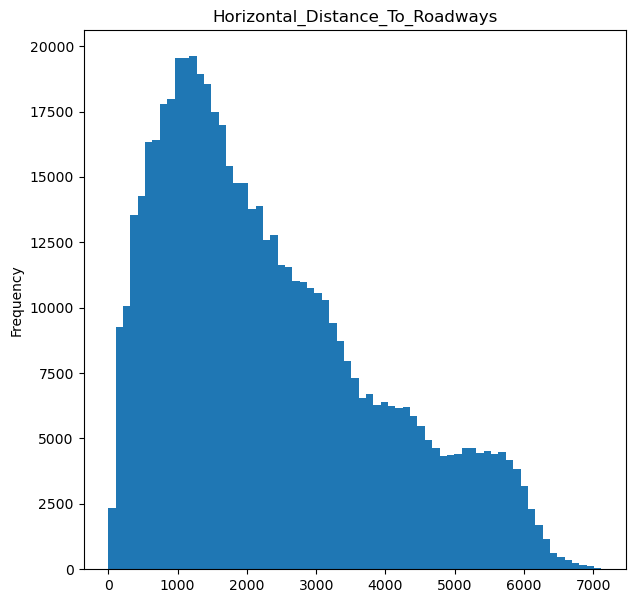

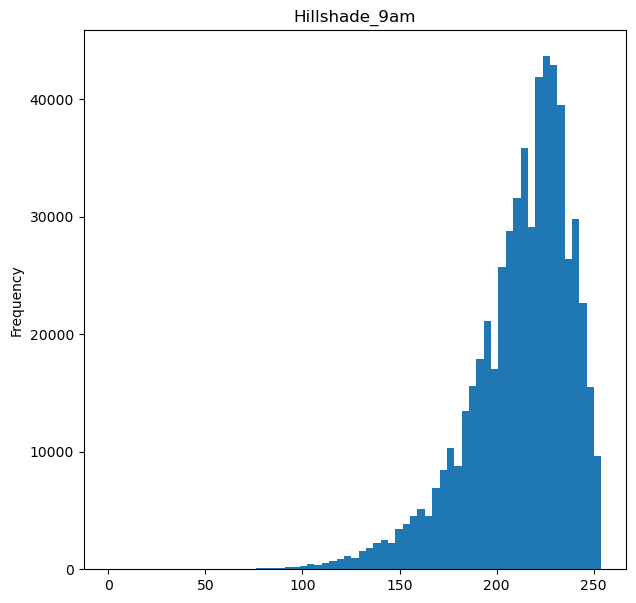

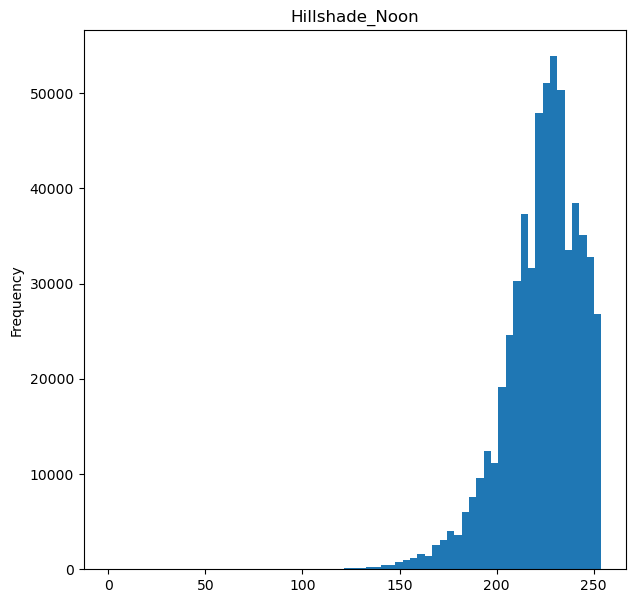

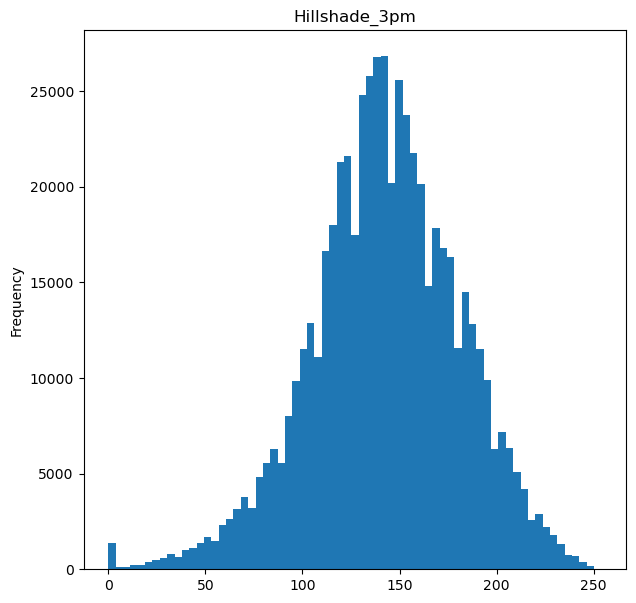

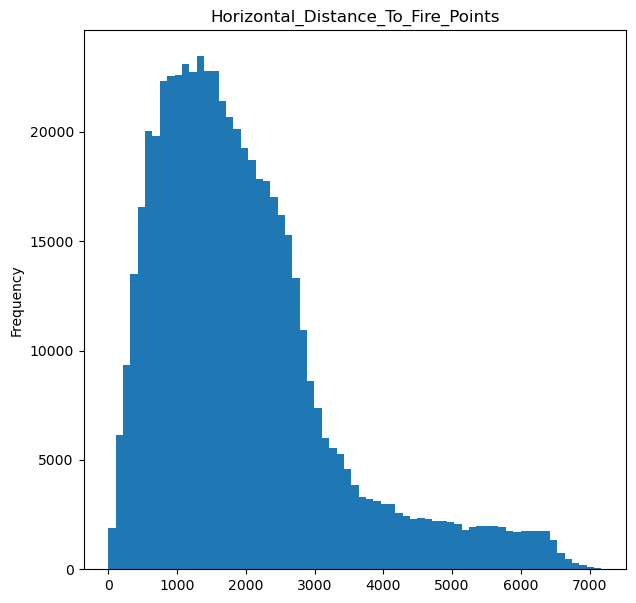

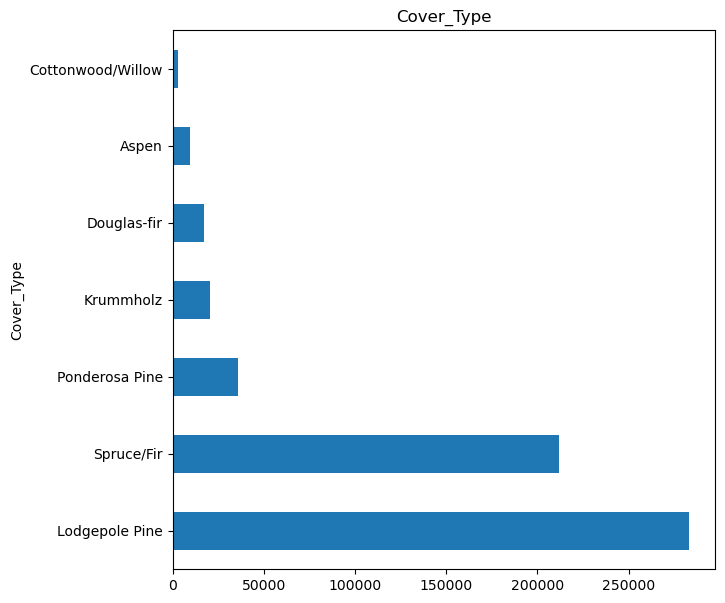

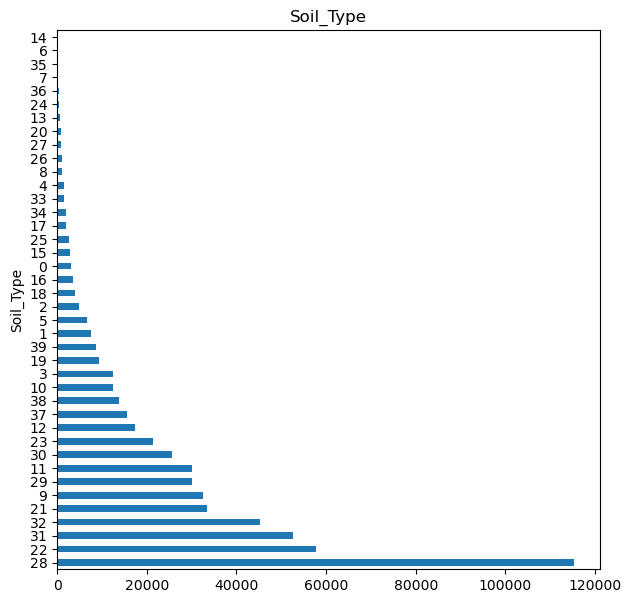

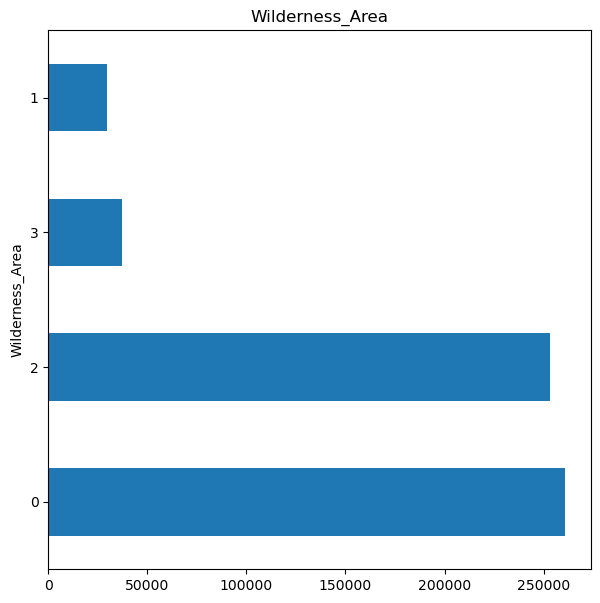

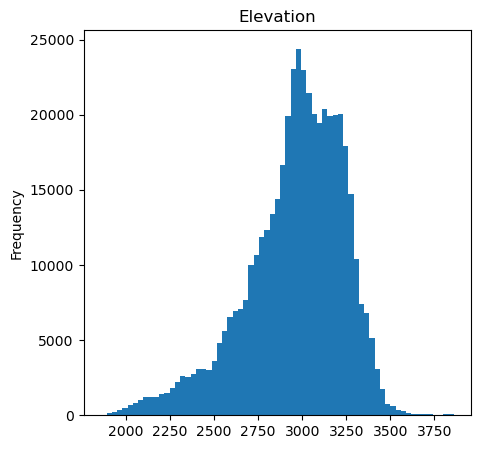

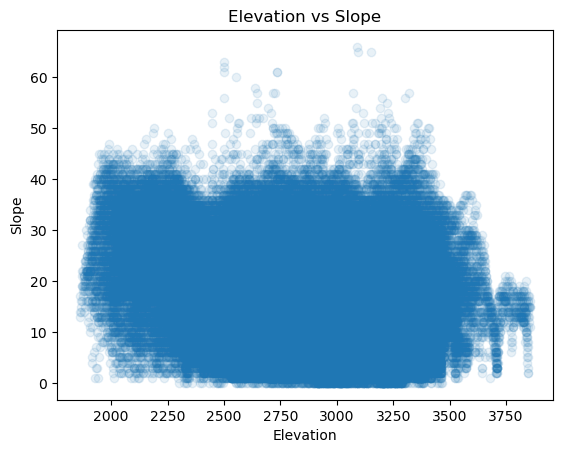

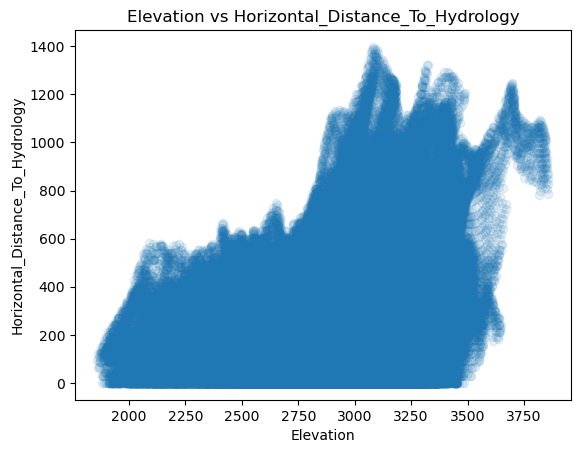

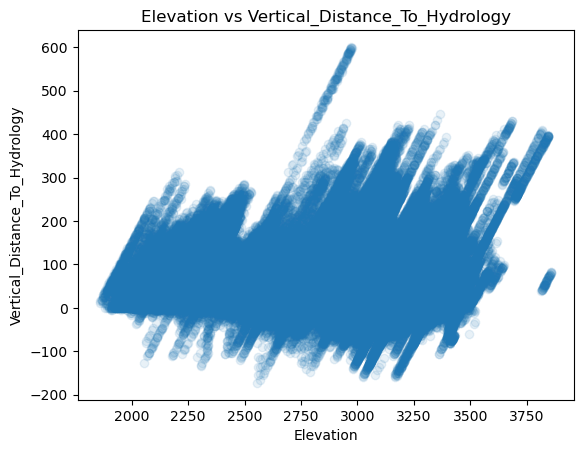

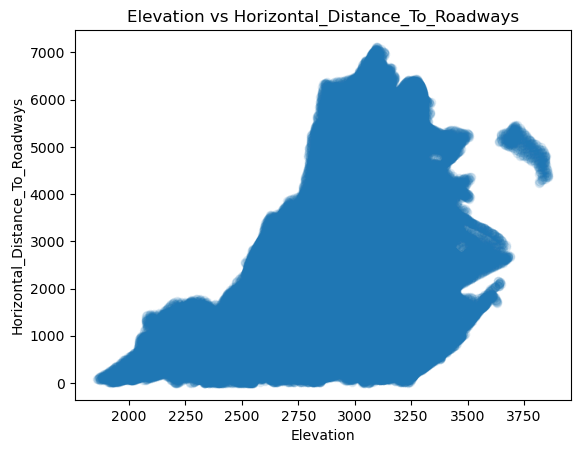

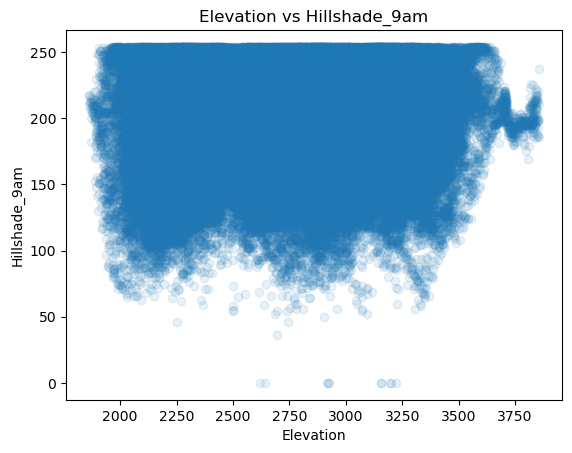

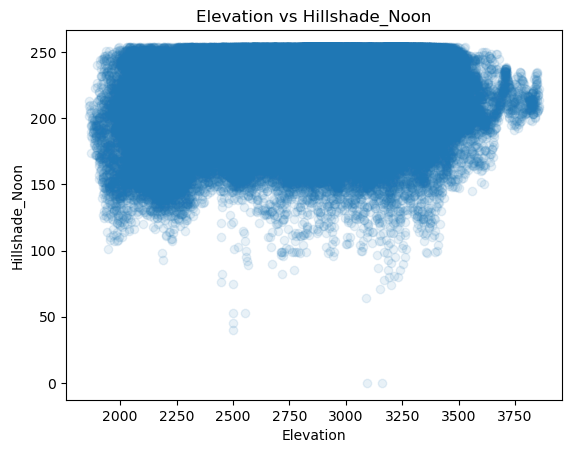

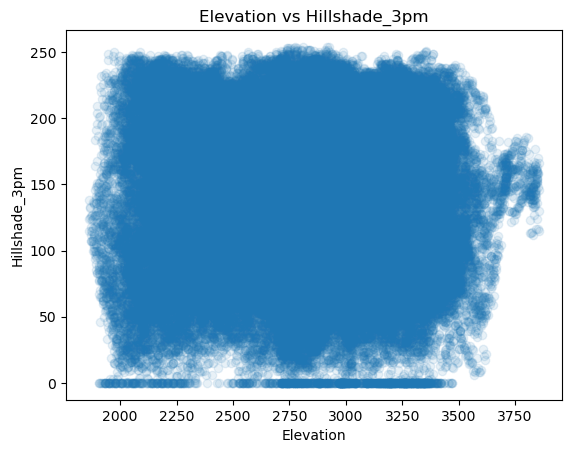

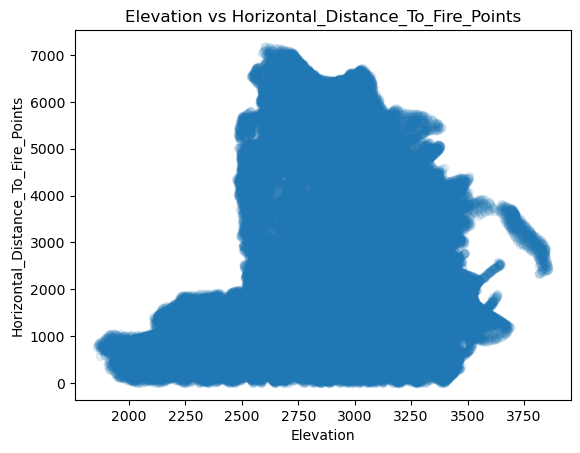

<Figure size 640x480 with 0 Axes>

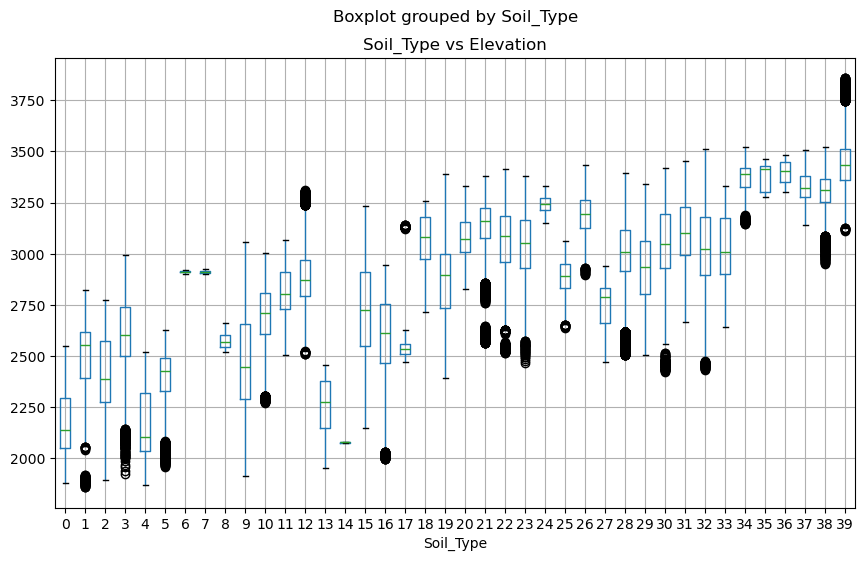

<Figure size 640x480 with 0 Axes>

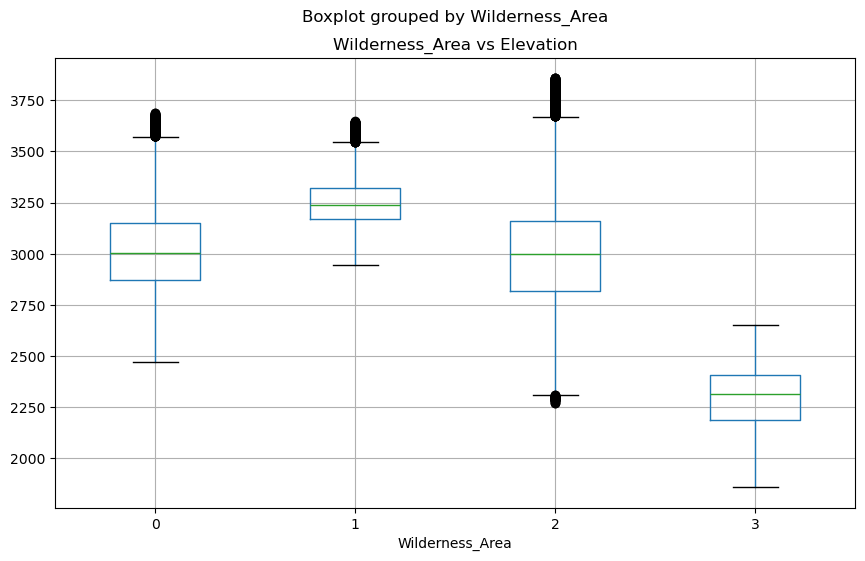

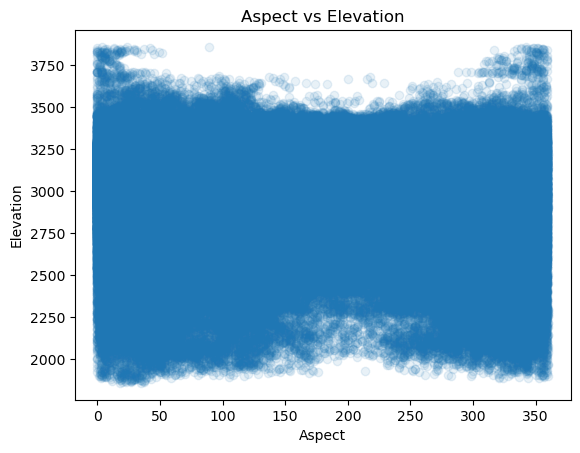

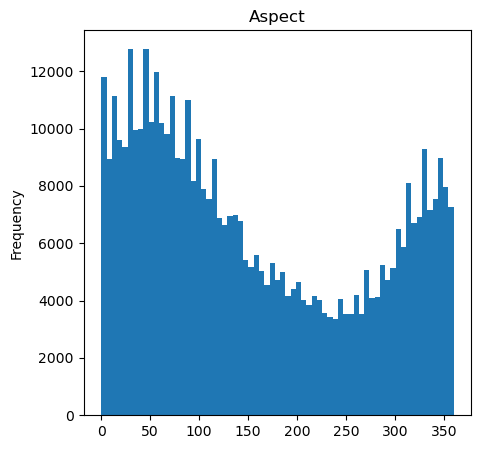

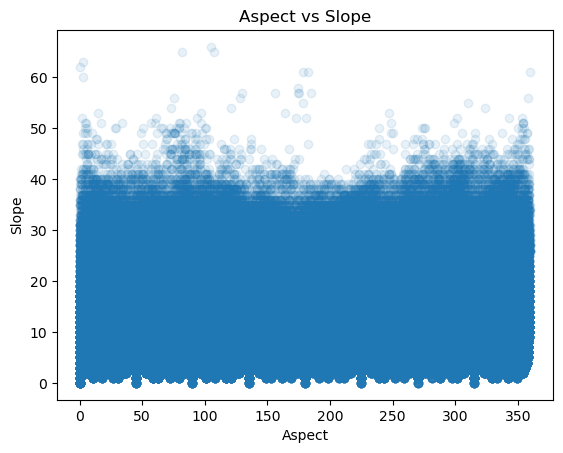

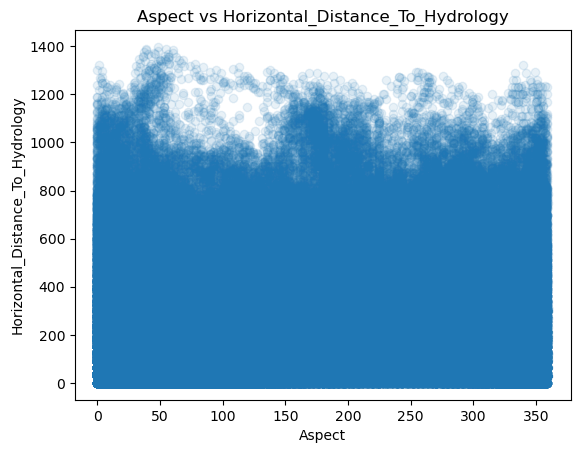

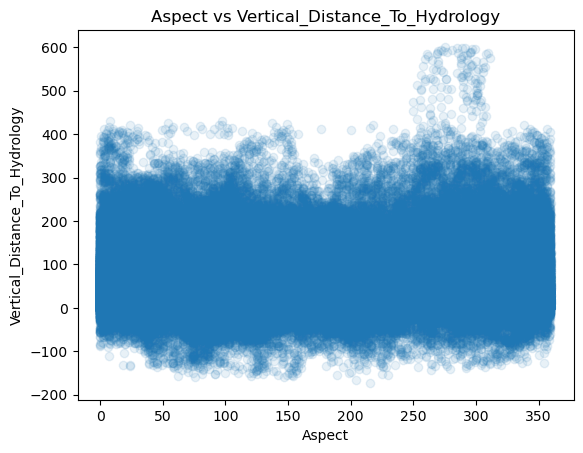

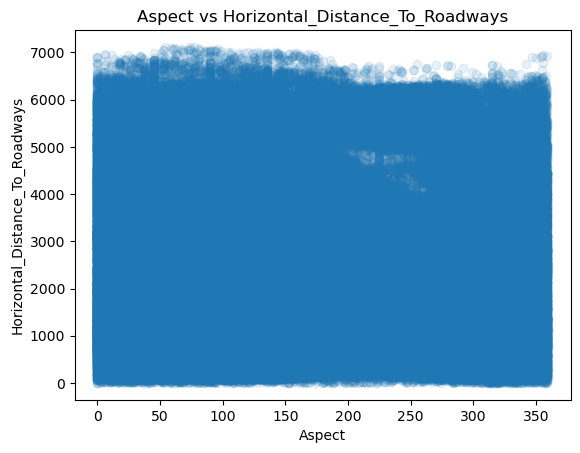

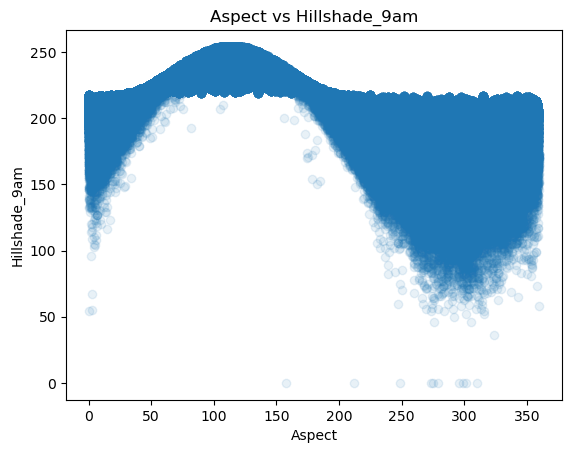

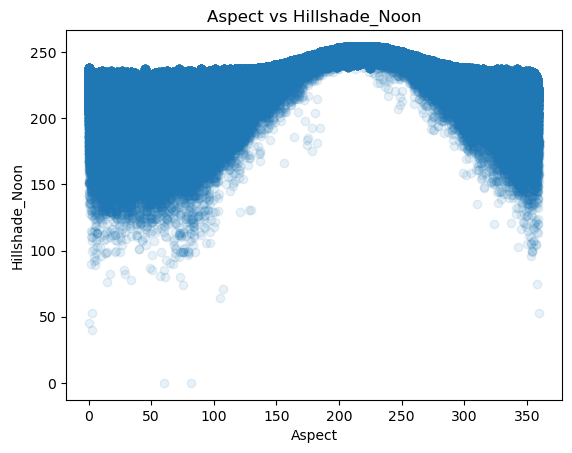

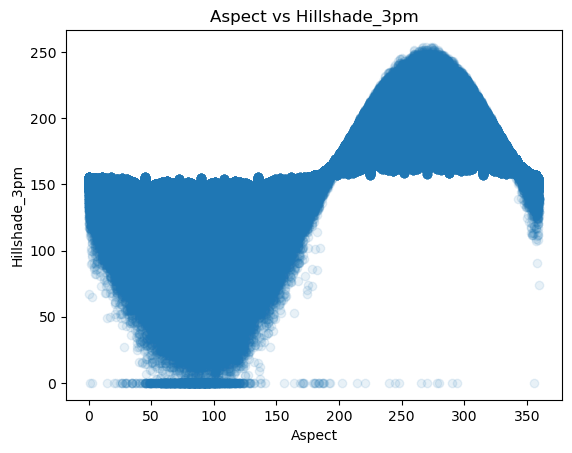

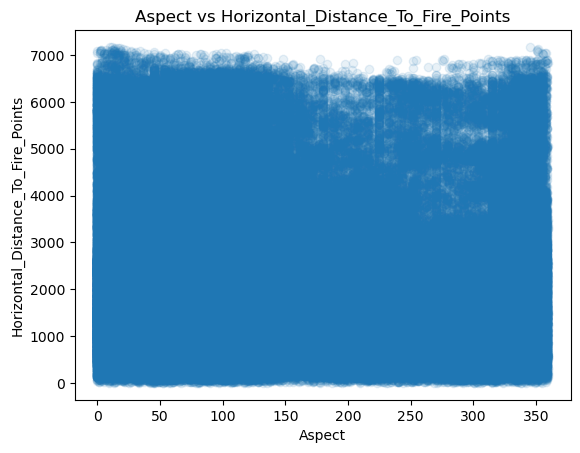

<Figure size 640x480 with 0 Axes>

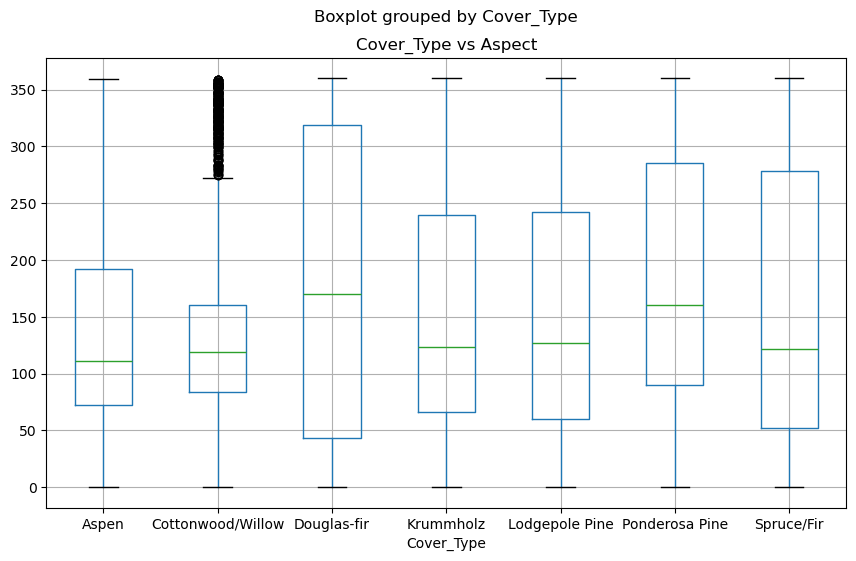

<Figure size 640x480 with 0 Axes>

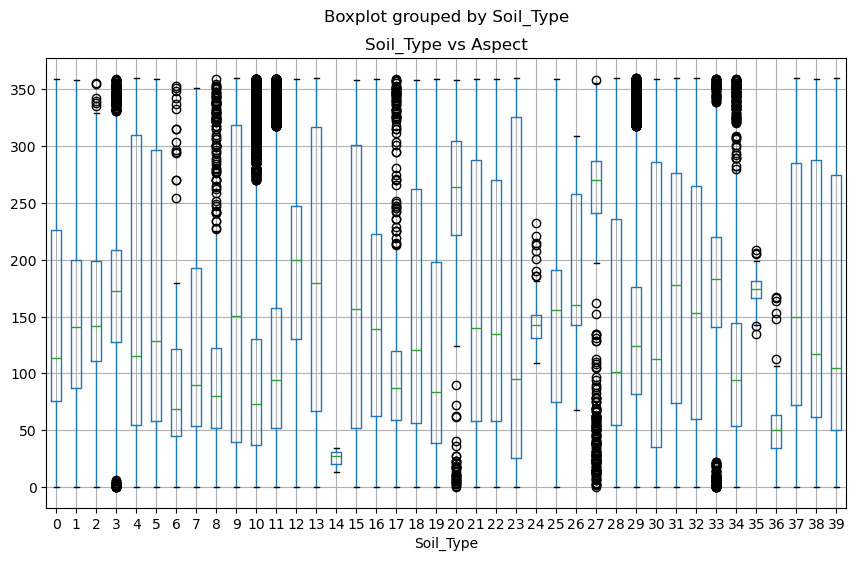

<Figure size 640x480 with 0 Axes>

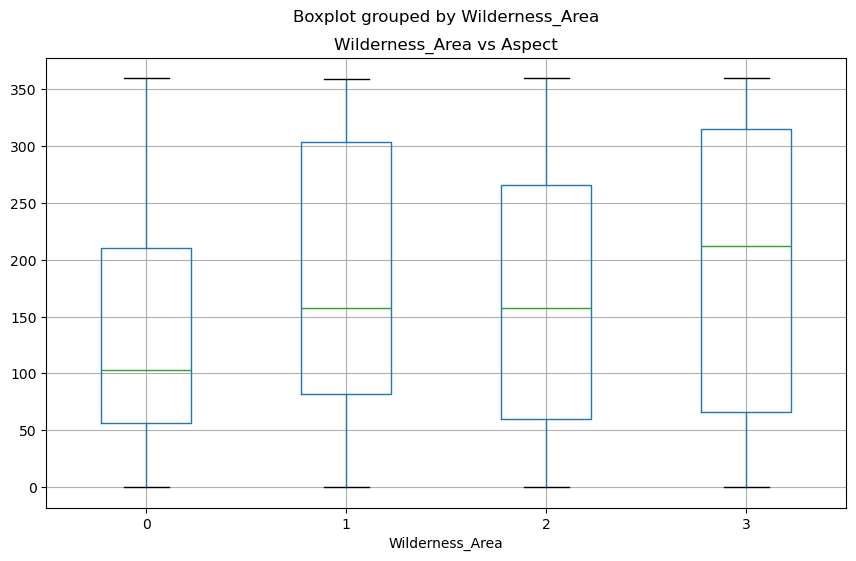

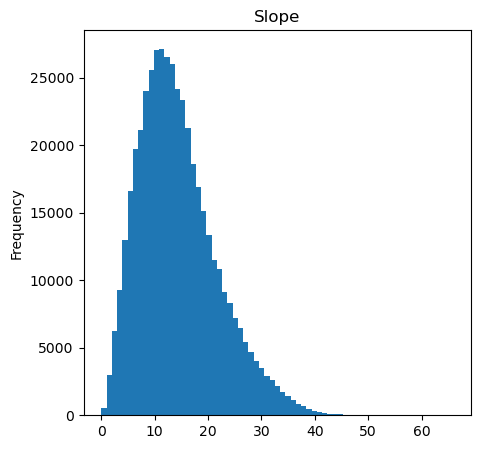

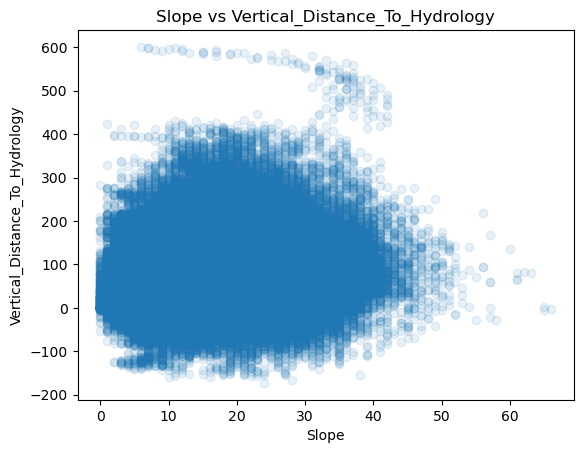

<Figure size 640x480 with 0 Axes>

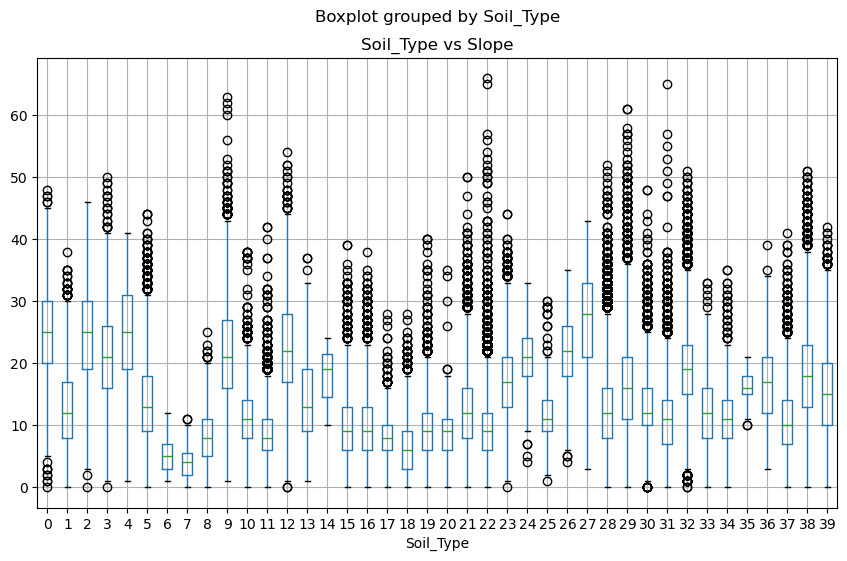

<Figure size 640x480 with 0 Axes>

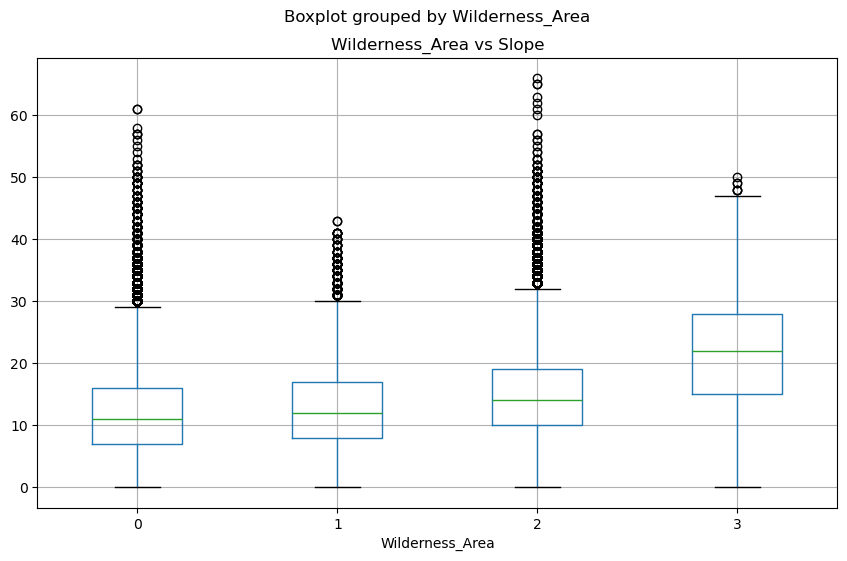

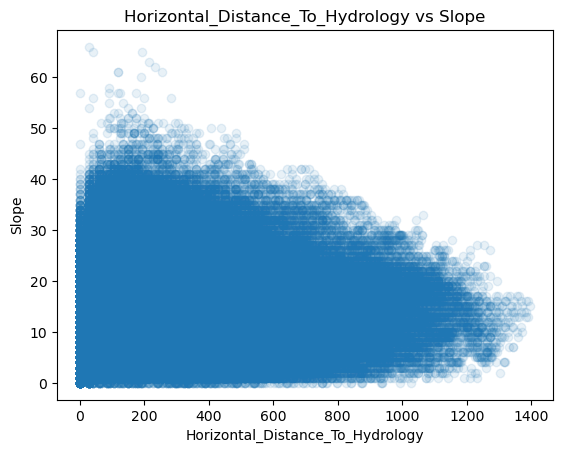

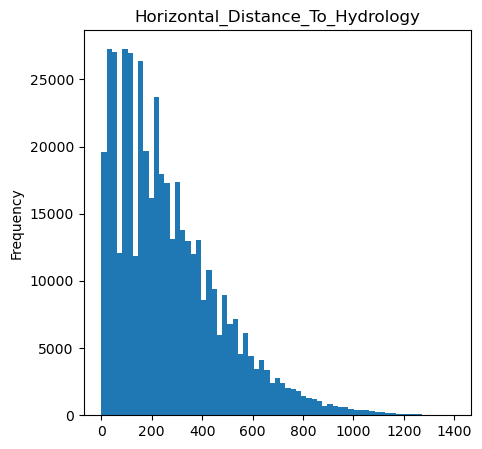

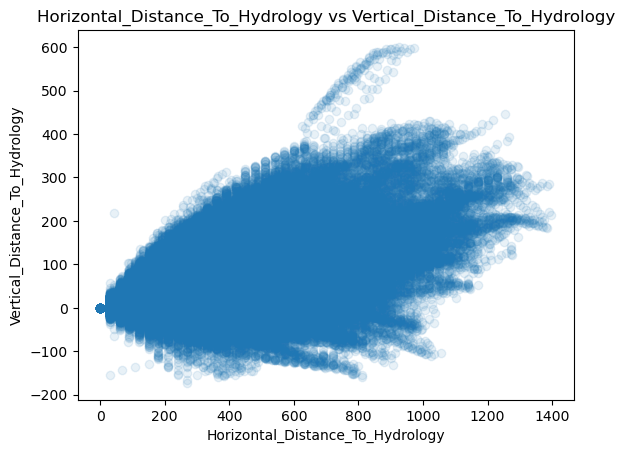

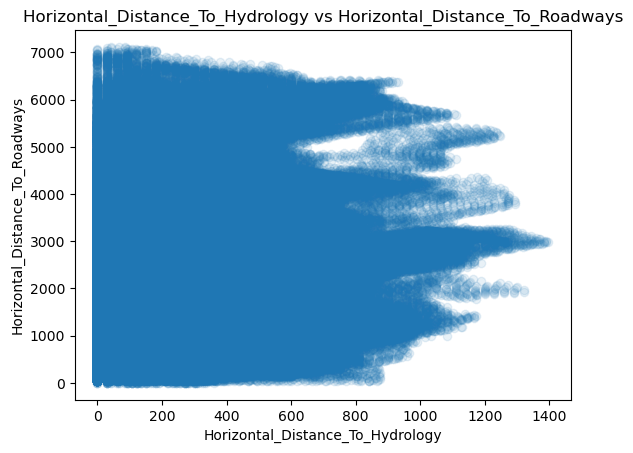

<Figure size 640x480 with 0 Axes>

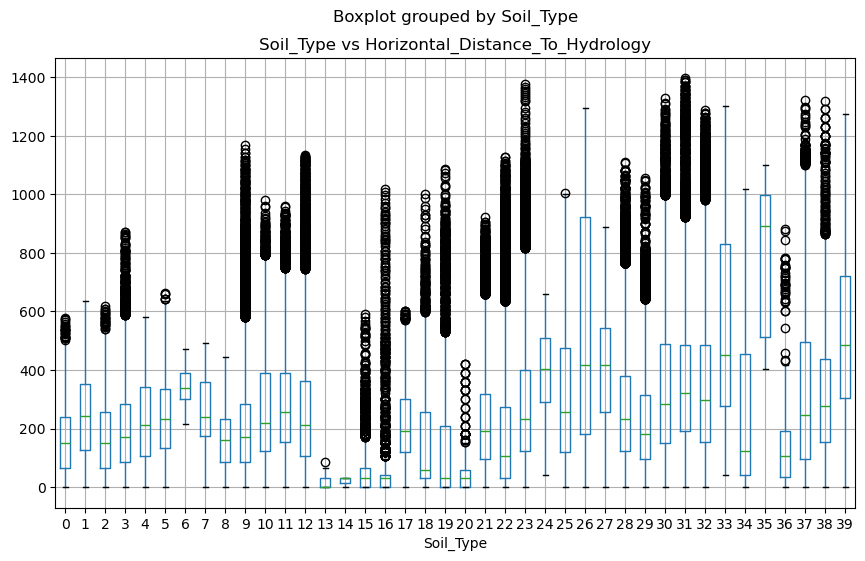

<Figure size 640x480 with 0 Axes>

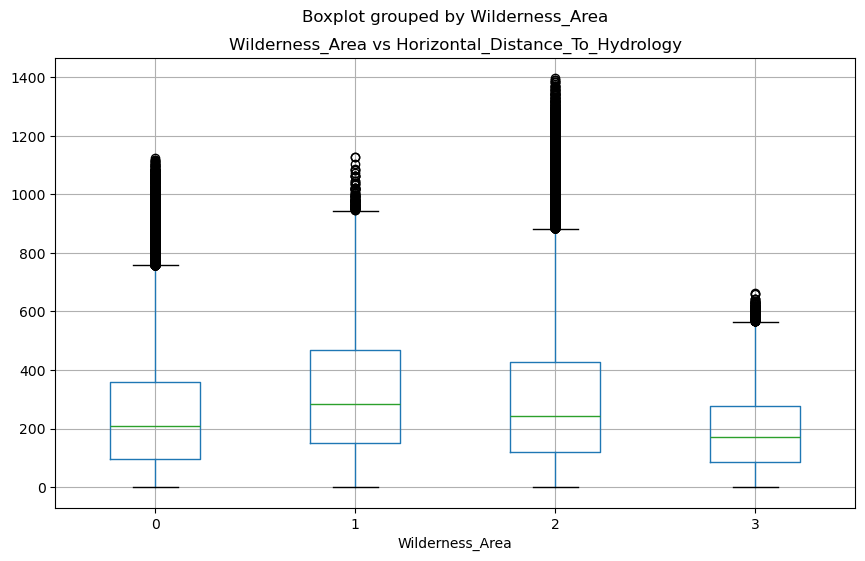

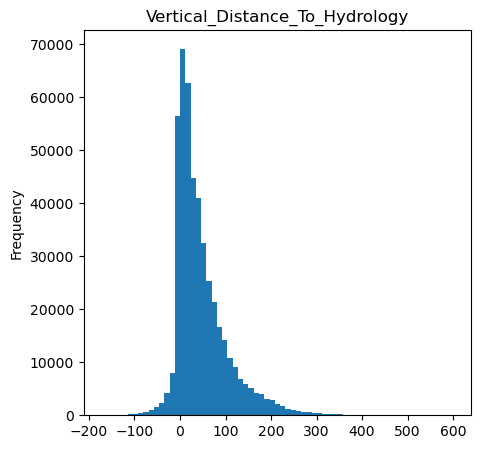

<Figure size 640x480 with 0 Axes>

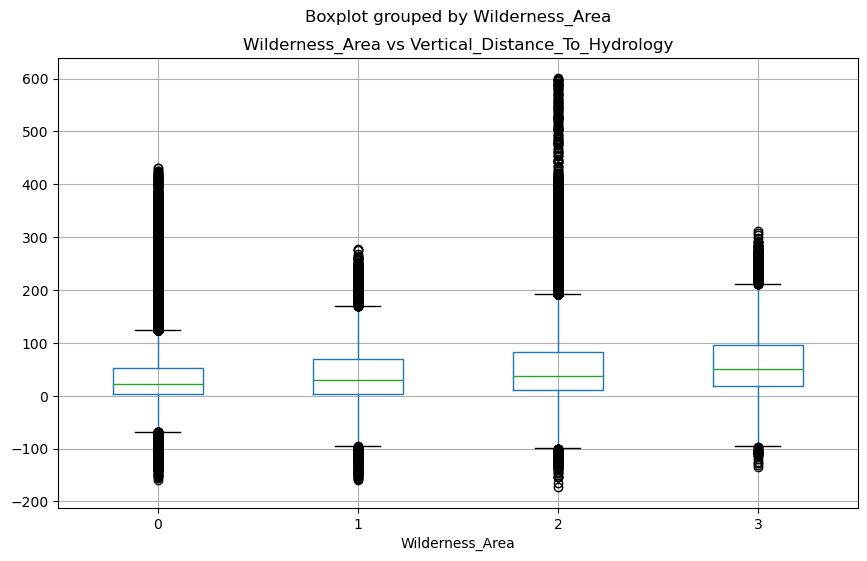

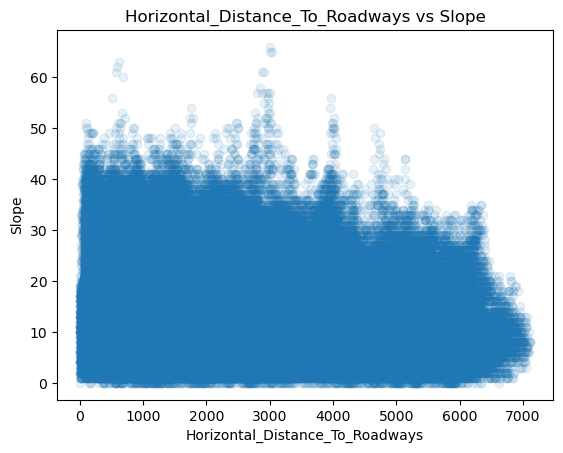

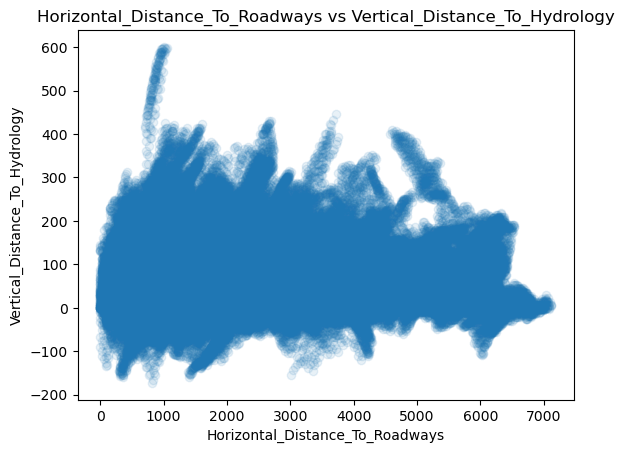

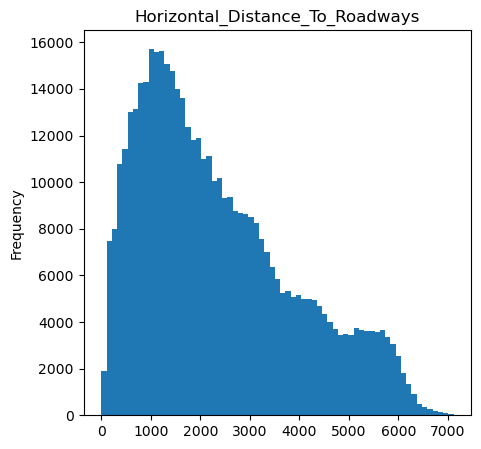

<Figure size 640x480 with 0 Axes>

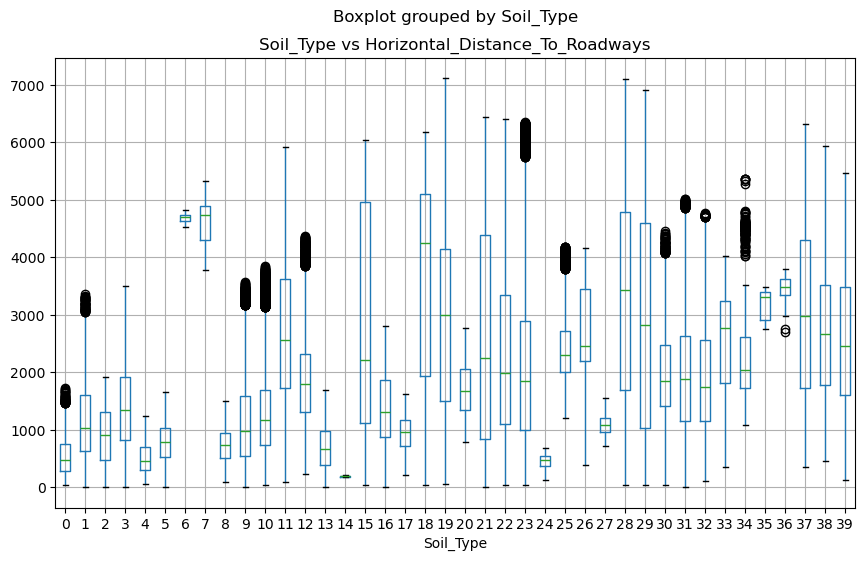

<Figure size 640x480 with 0 Axes>

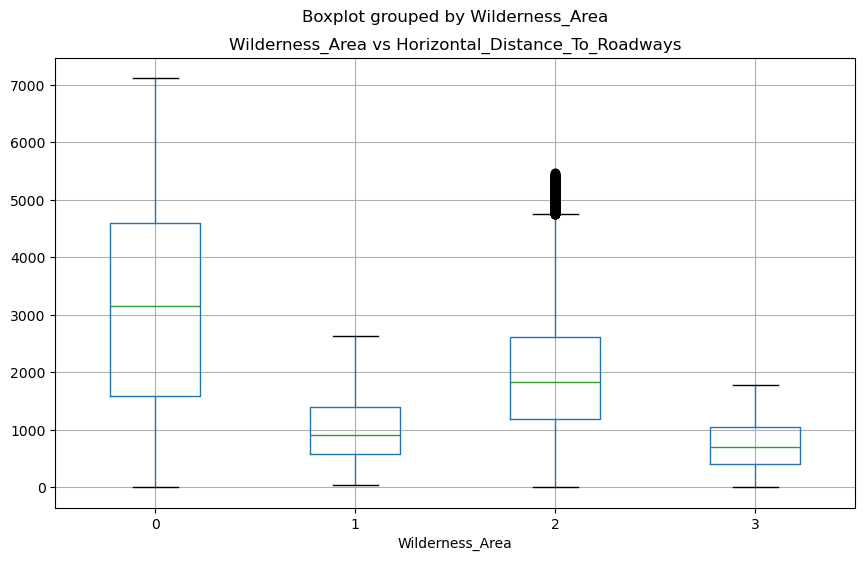

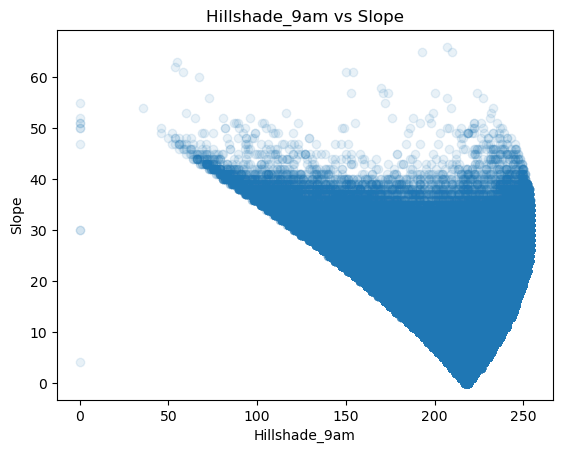

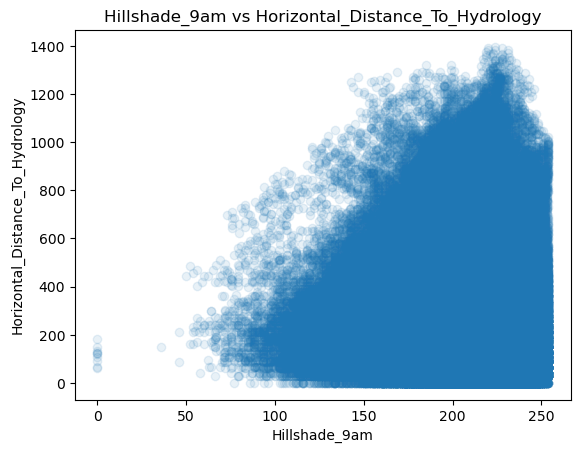

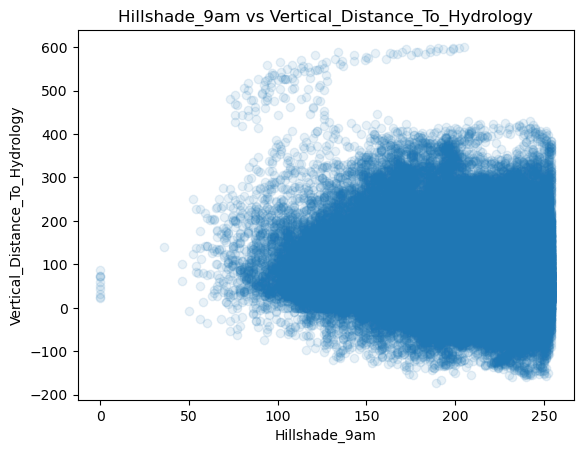

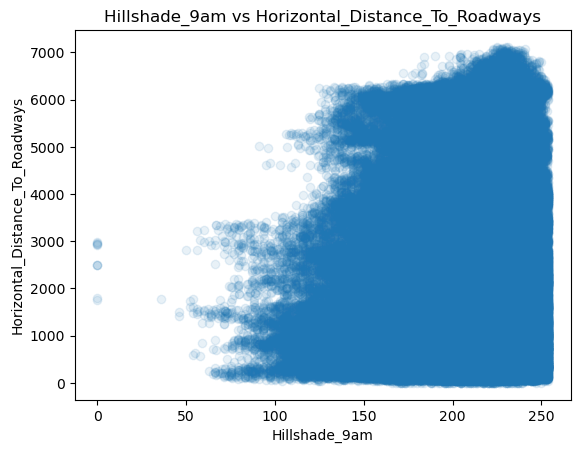

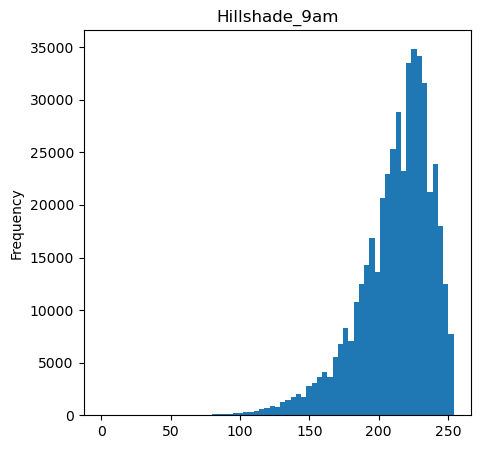

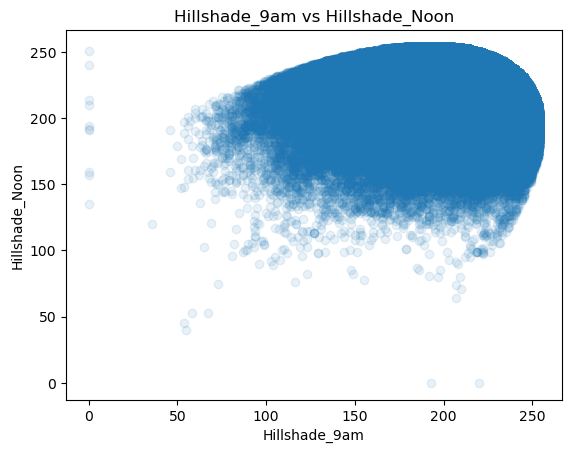

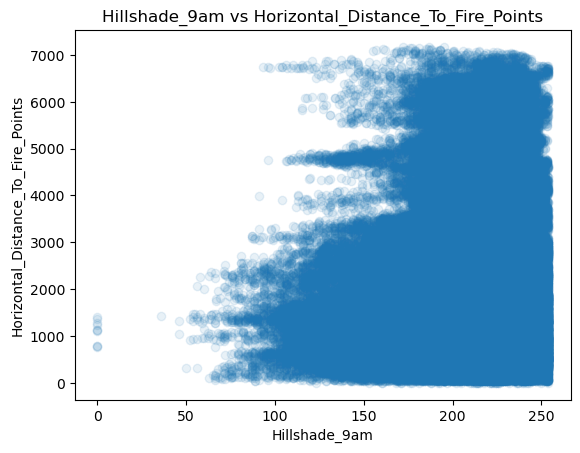

<Figure size 640x480 with 0 Axes>

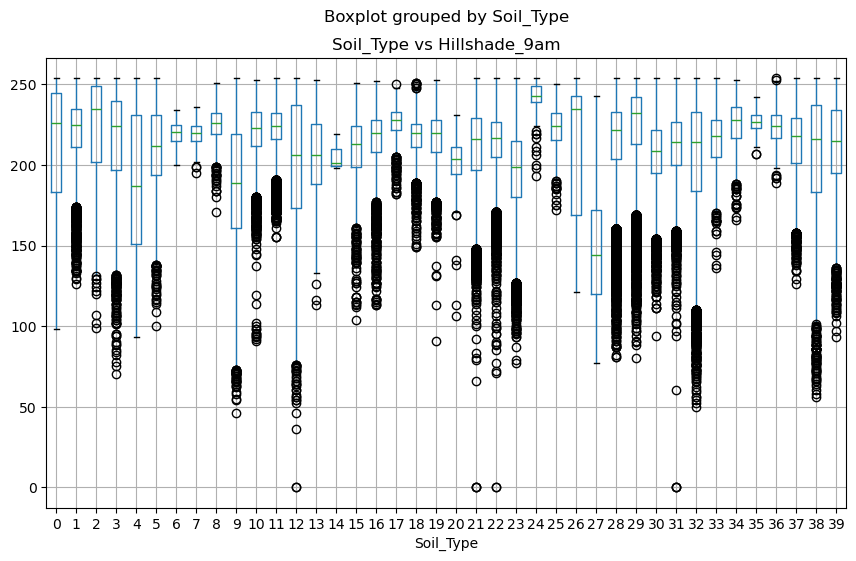

<Figure size 640x480 with 0 Axes>

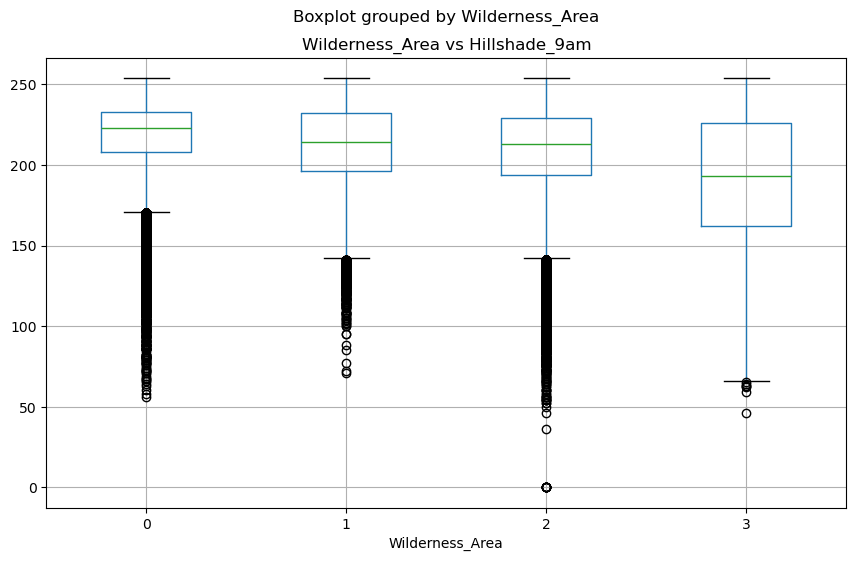

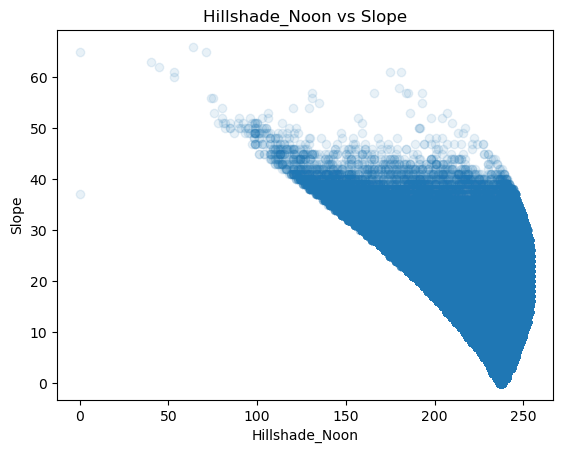

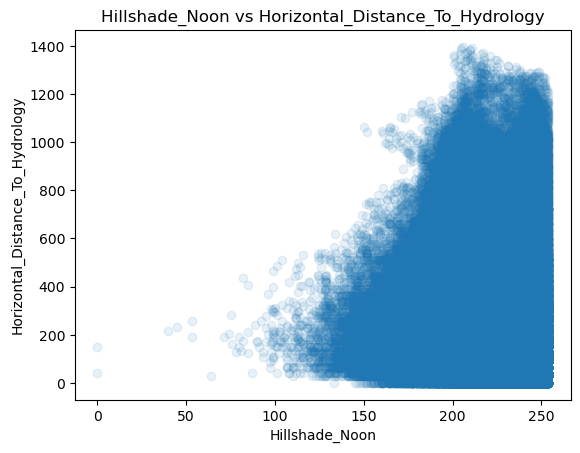

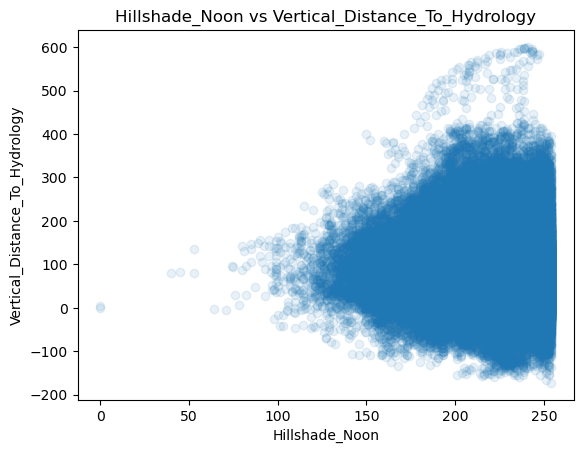

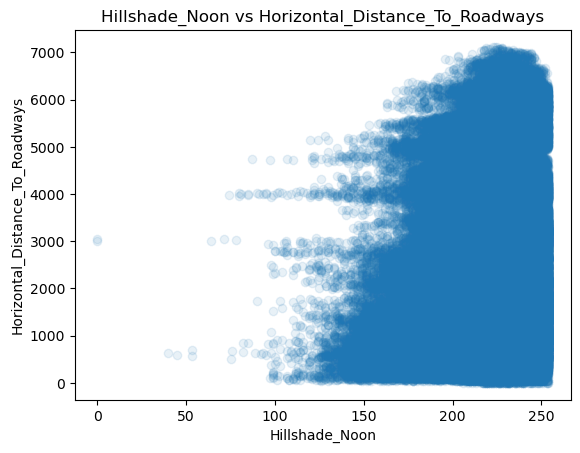

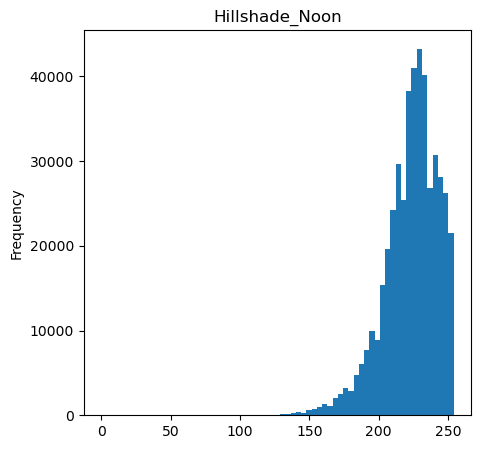

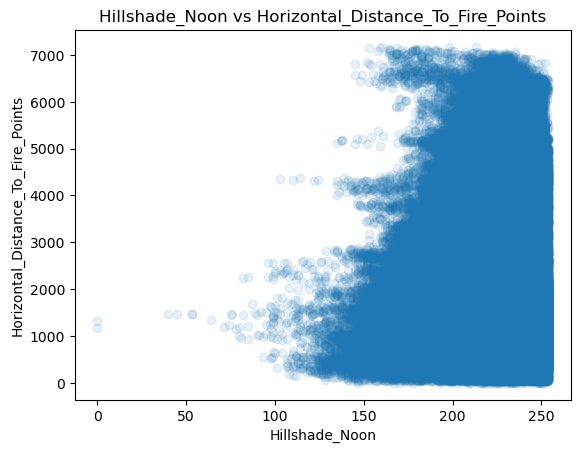

<Figure size 640x480 with 0 Axes>

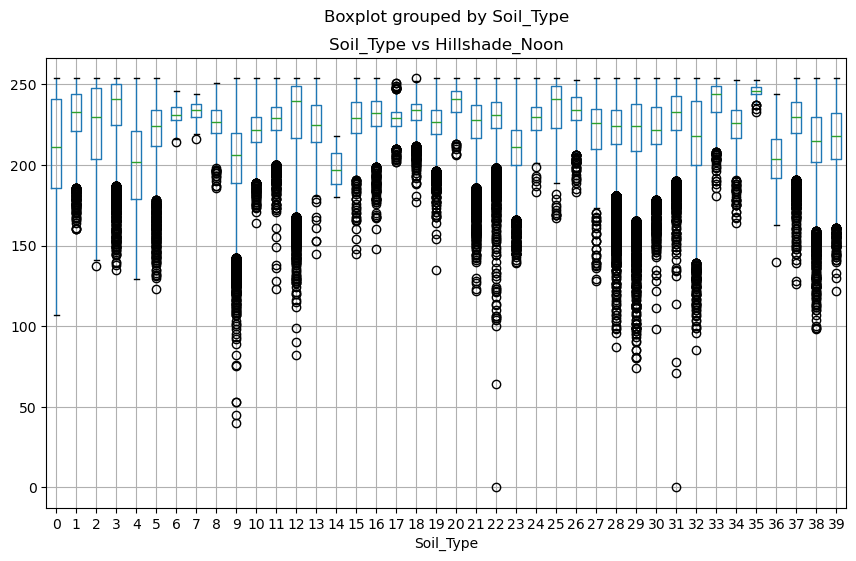

<Figure size 640x480 with 0 Axes>

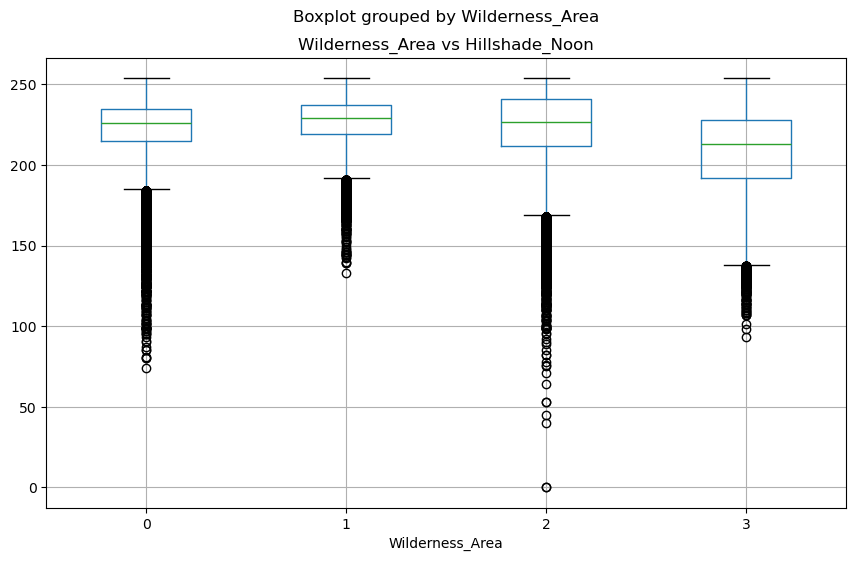

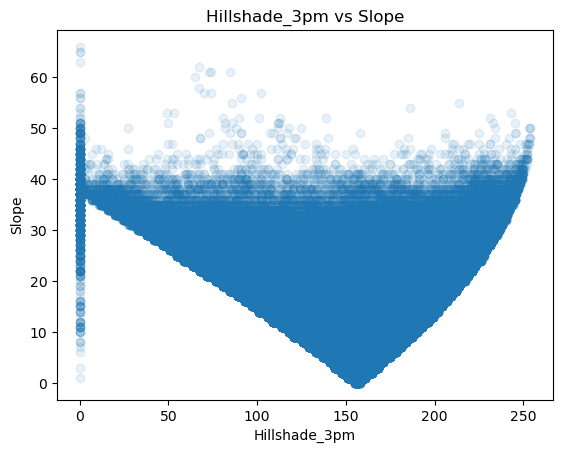

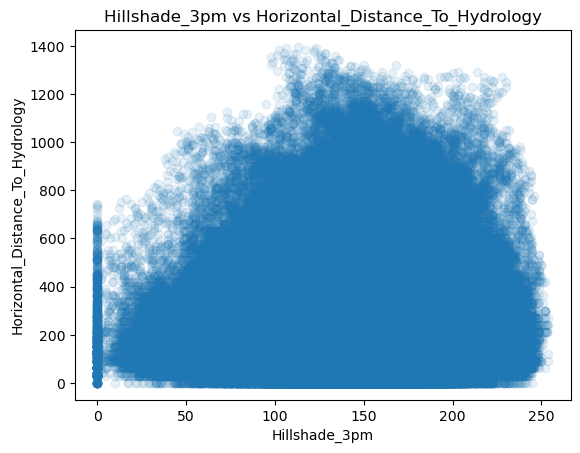

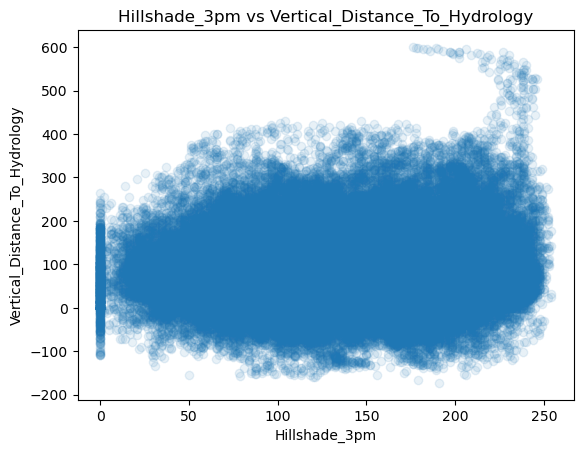

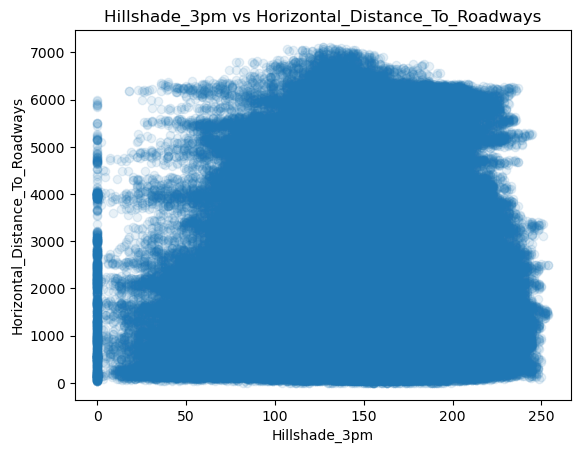

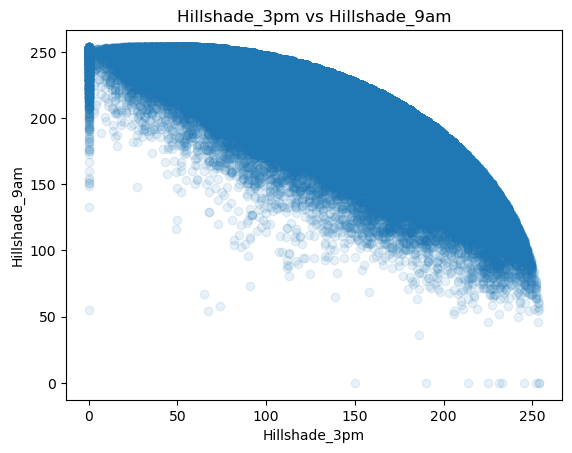

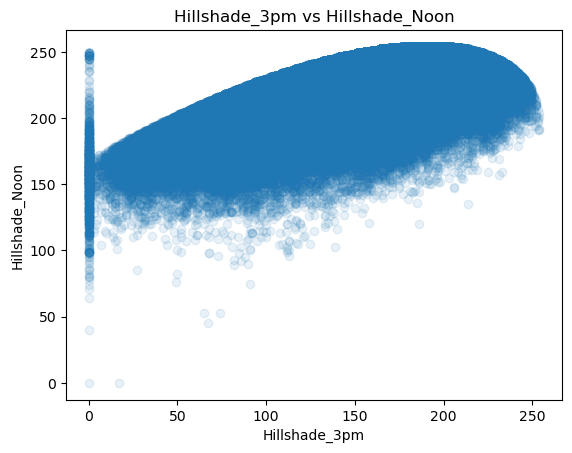

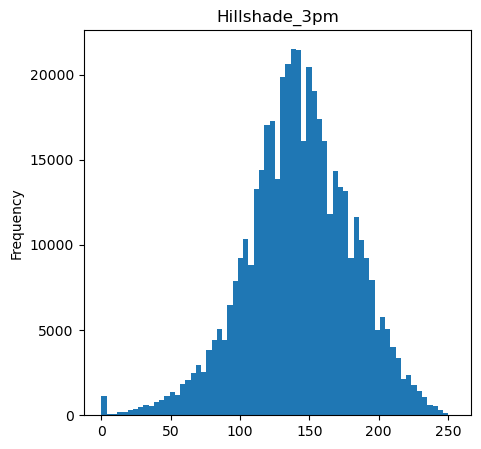

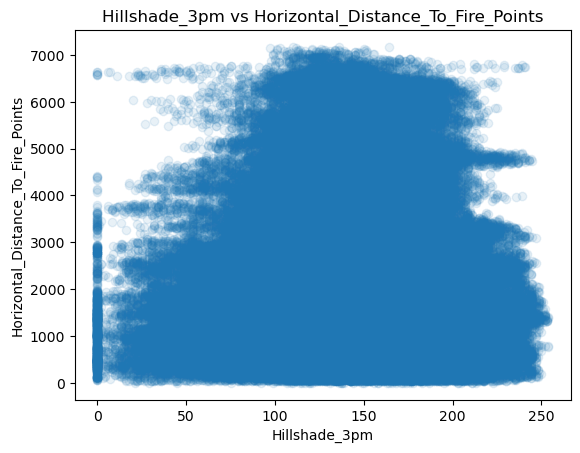

<Figure size 640x480 with 0 Axes>

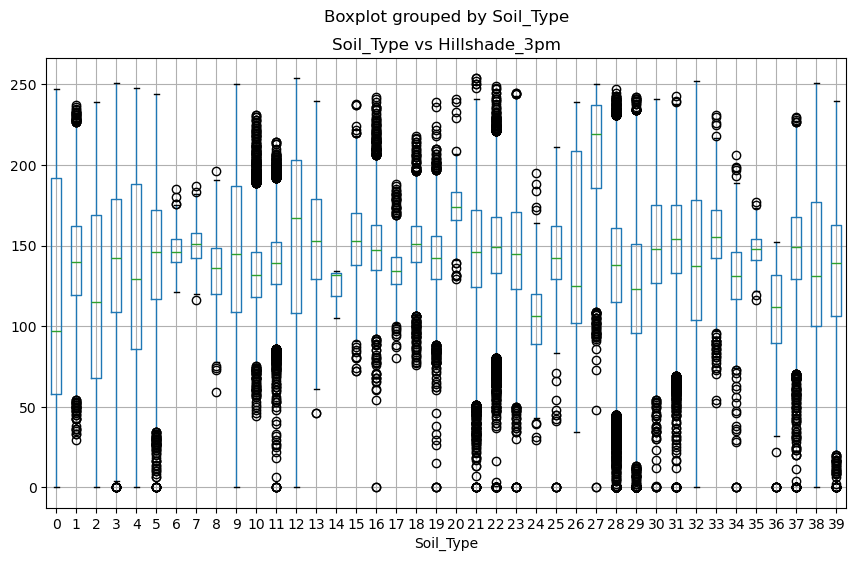

<Figure size 640x480 with 0 Axes>

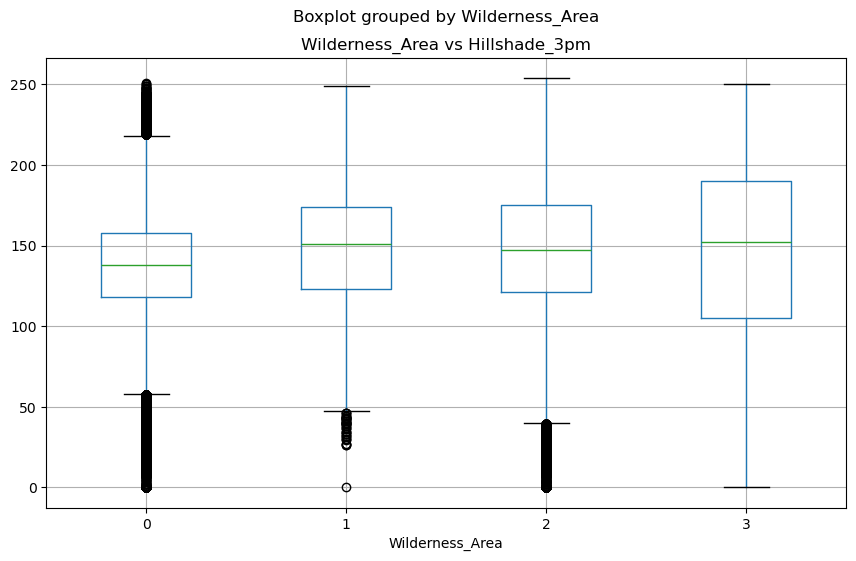

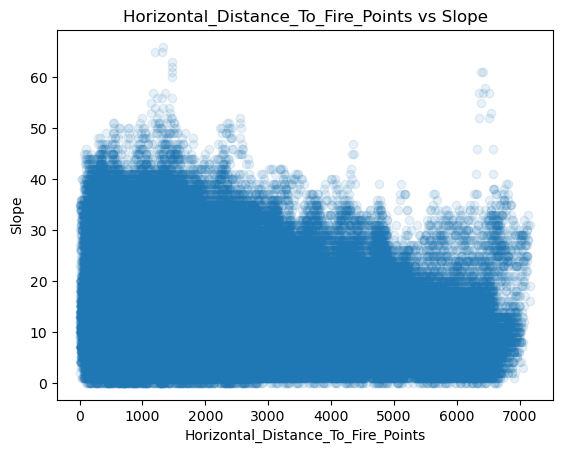

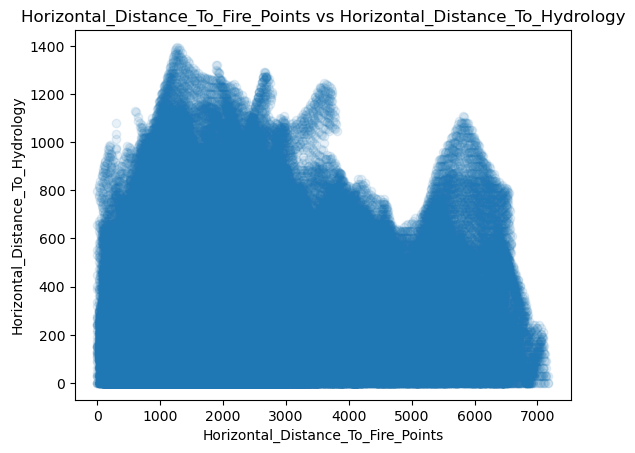

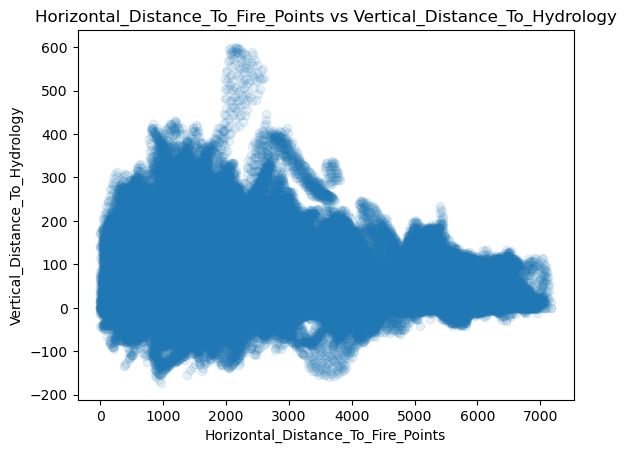

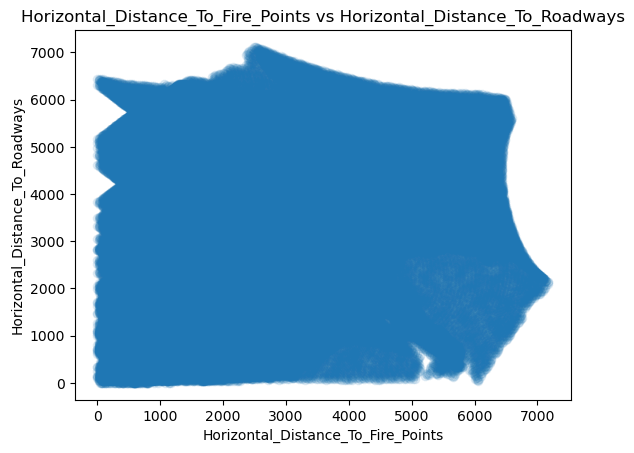

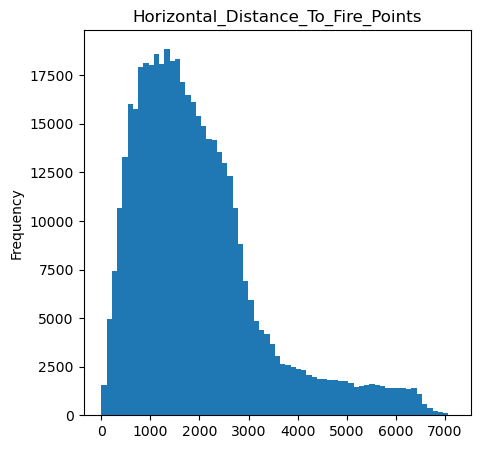

<Figure size 640x480 with 0 Axes>

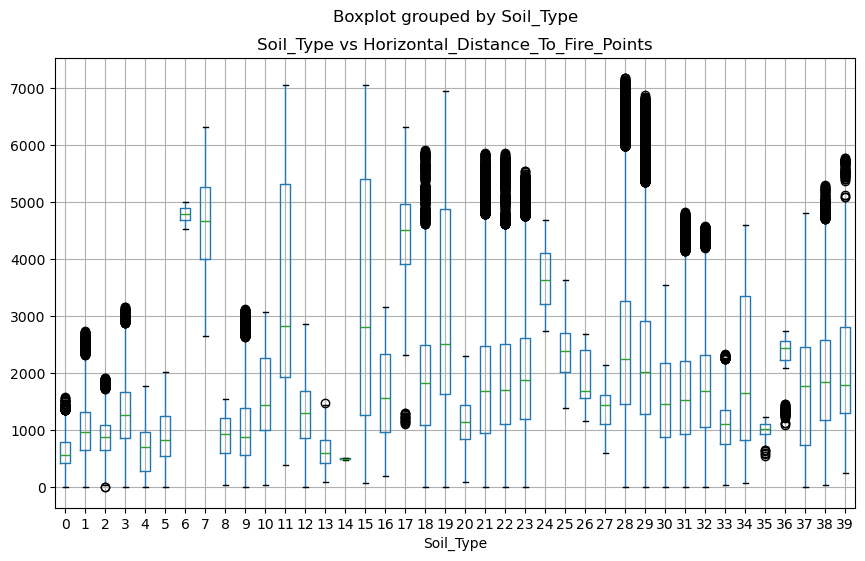

<Figure size 640x480 with 0 Axes>

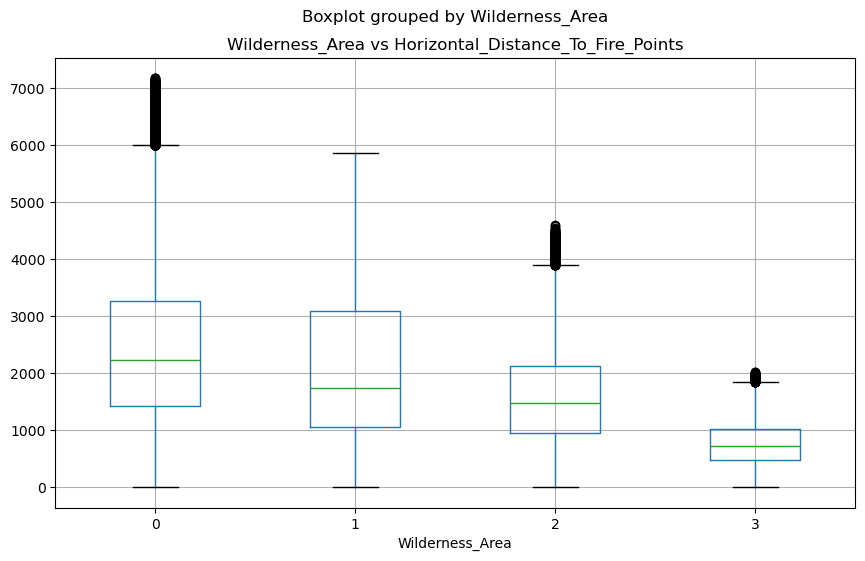

<Figure size 640x480 with 0 Axes>

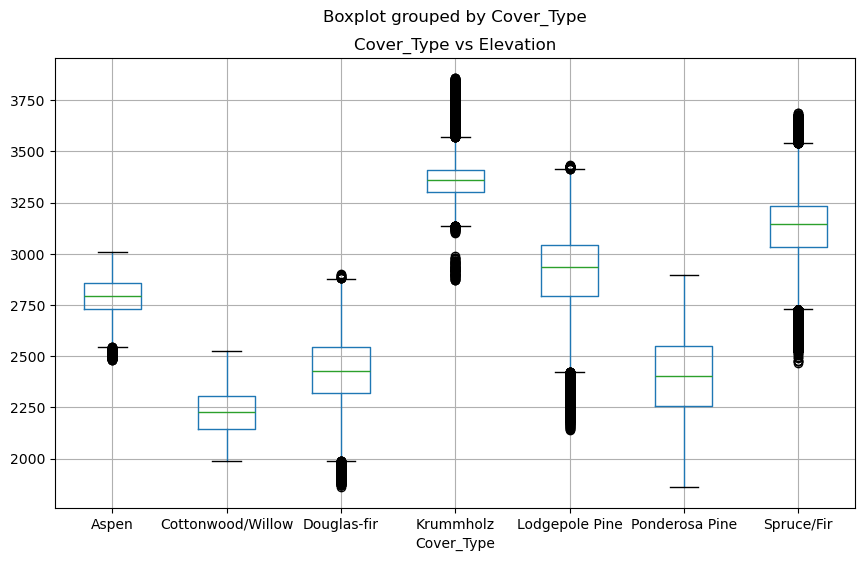

<Figure size 640x480 with 0 Axes>

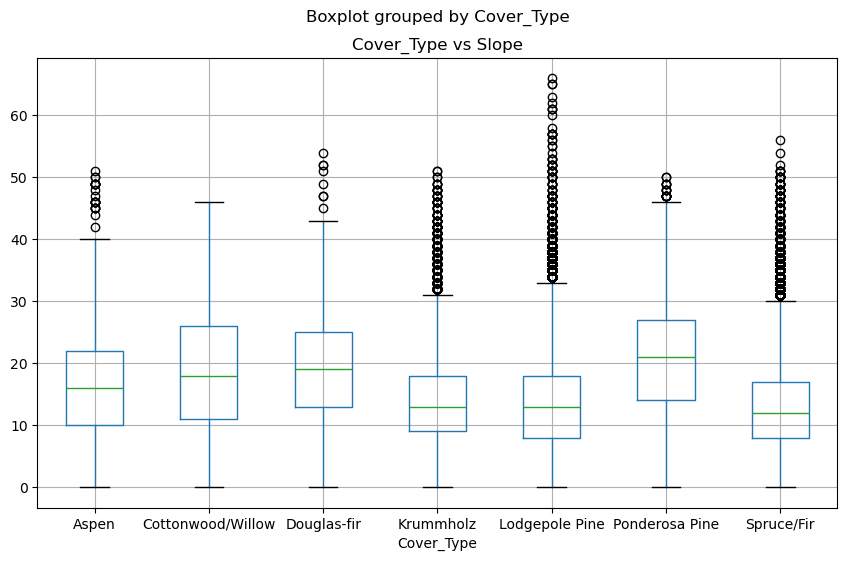

<Figure size 640x480 with 0 Axes>

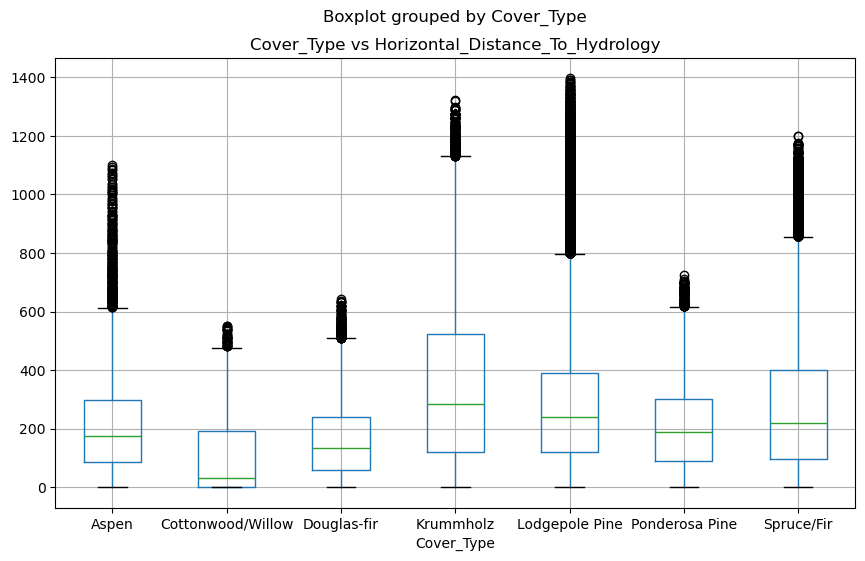

<Figure size 640x480 with 0 Axes>

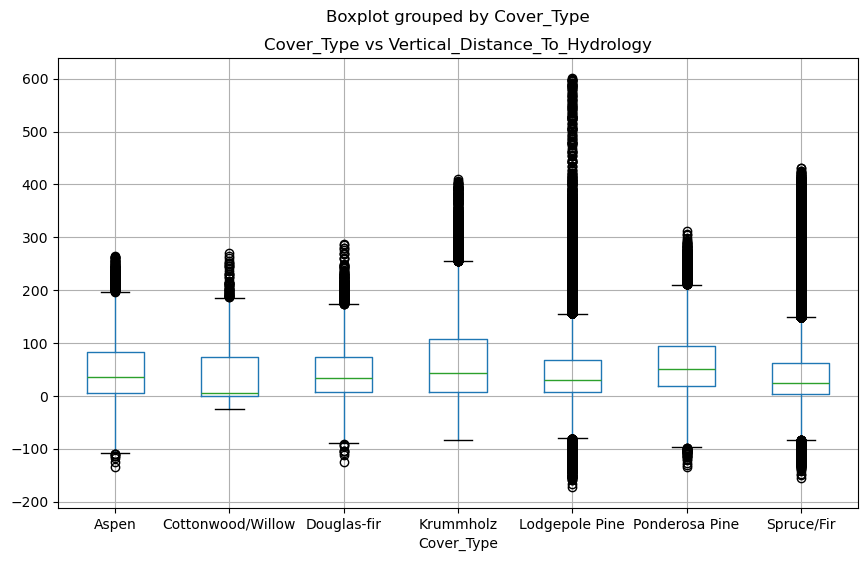

<Figure size 640x480 with 0 Axes>

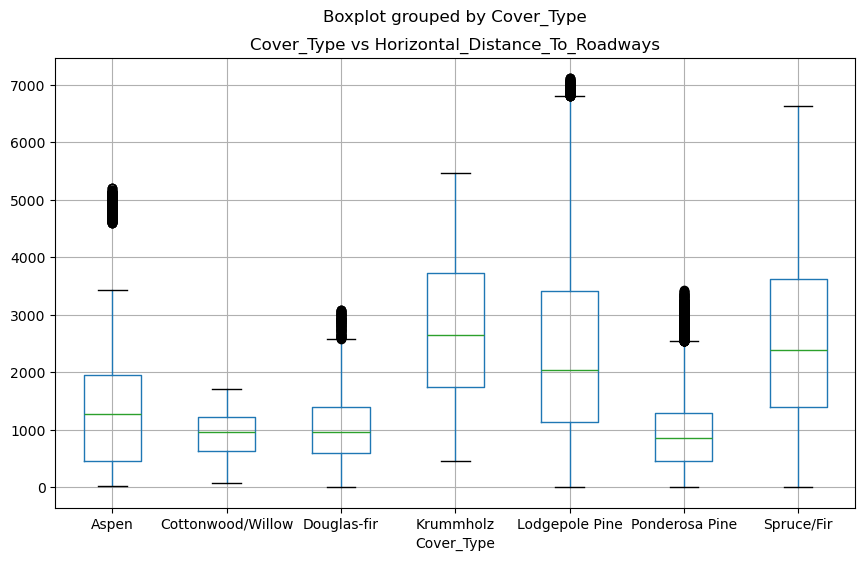

<Figure size 640x480 with 0 Axes>

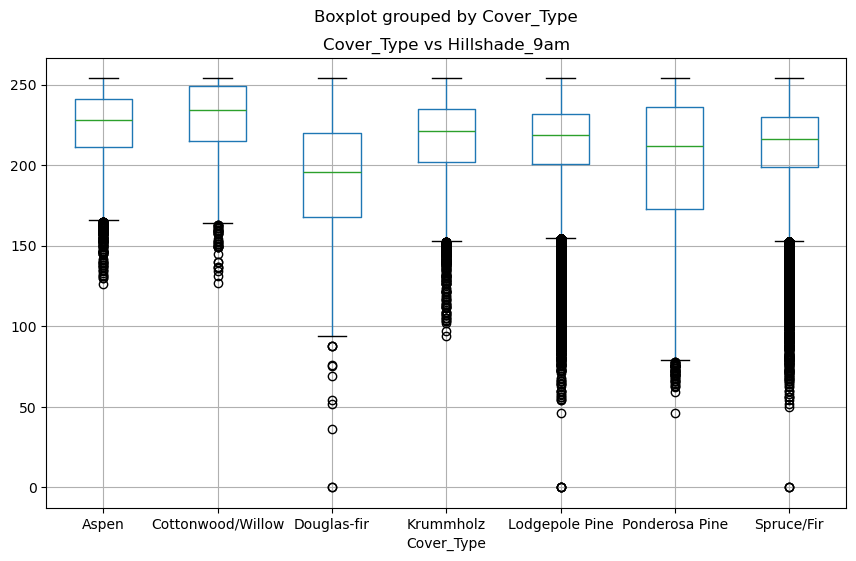

<Figure size 640x480 with 0 Axes>

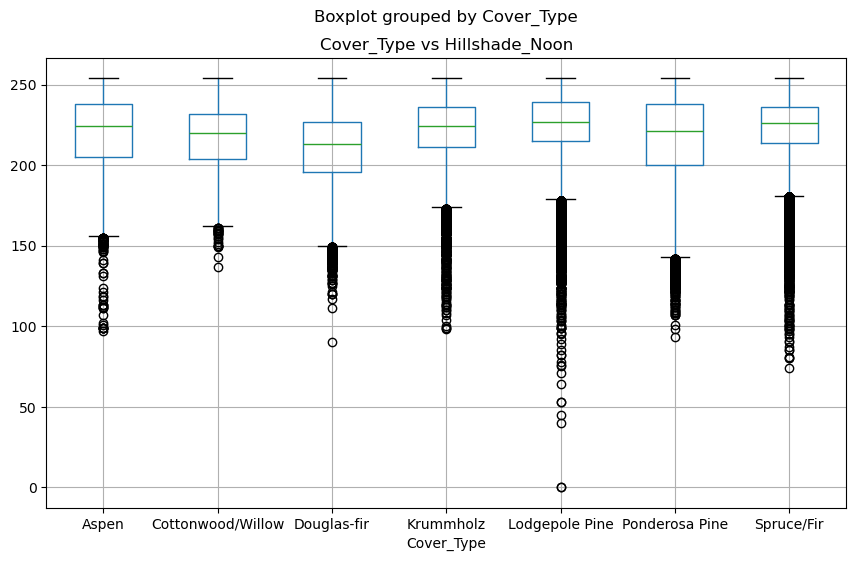

<Figure size 640x480 with 0 Axes>

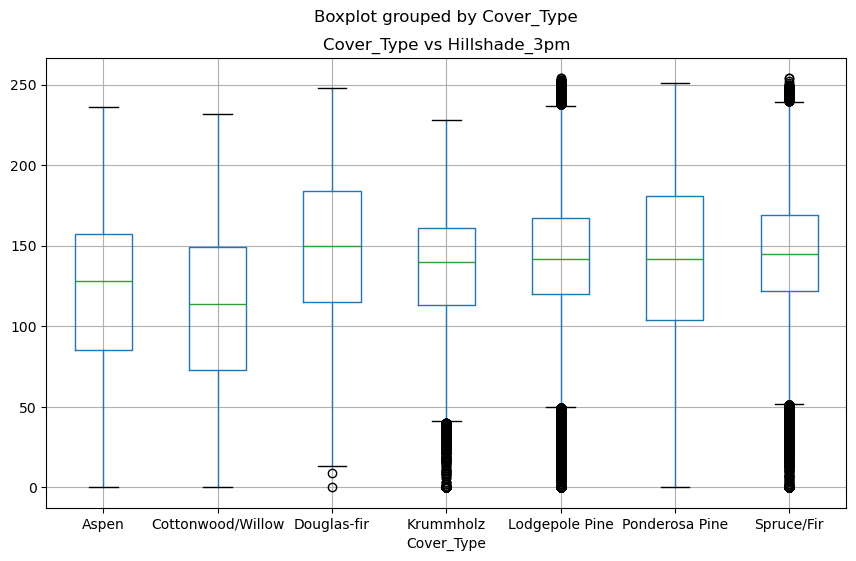

<Figure size 640x480 with 0 Axes>

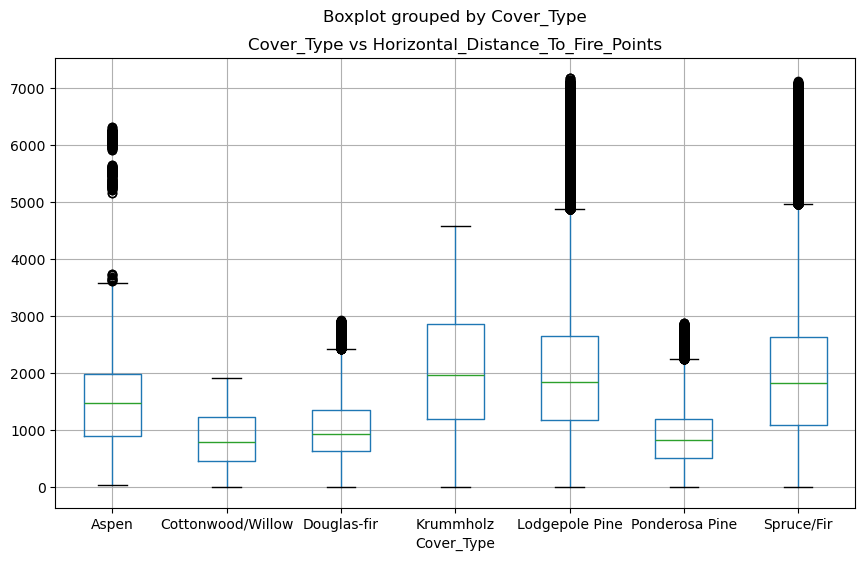

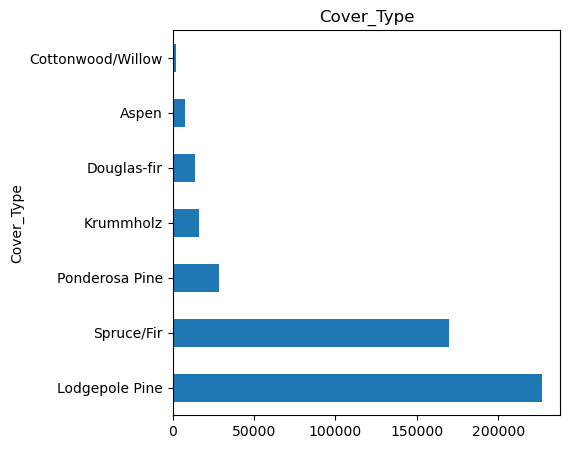

<Figure size 640x480 with 0 Axes>

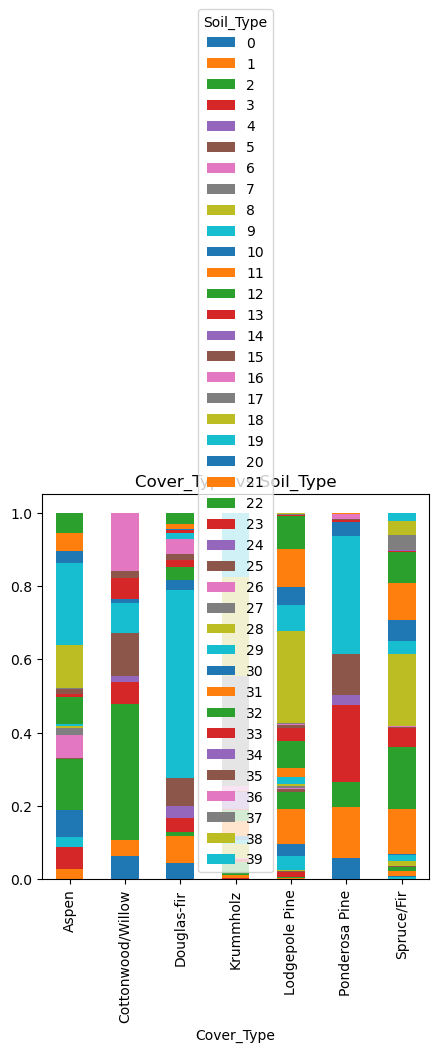

<Figure size 640x480 with 0 Axes>

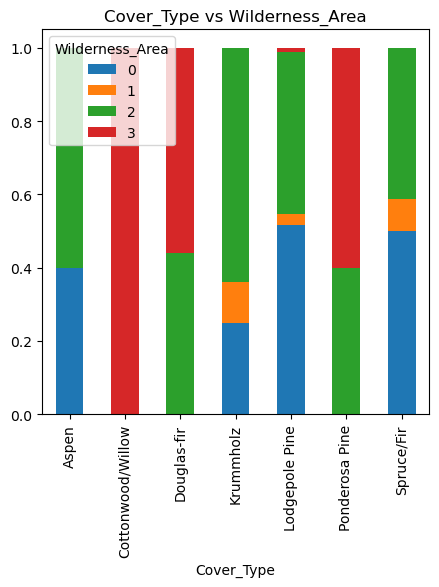

<Figure size 640x480 with 0 Axes>

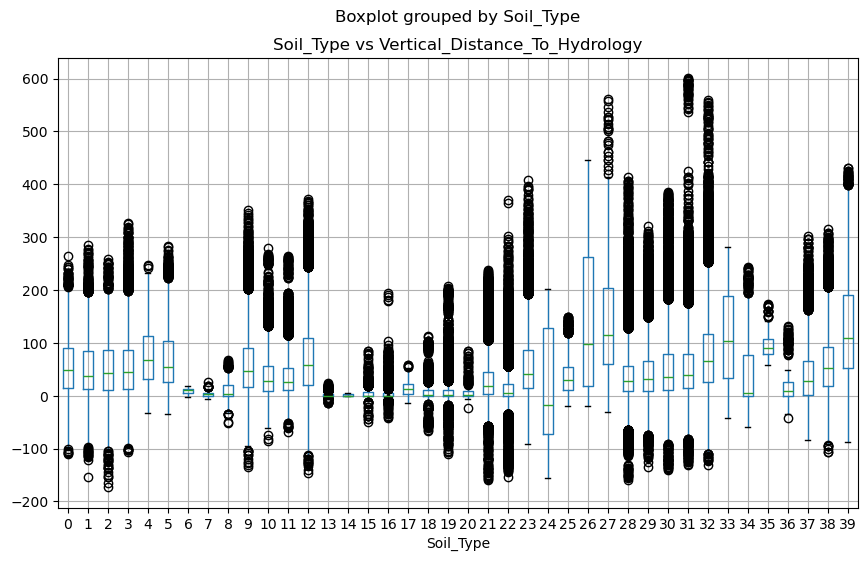

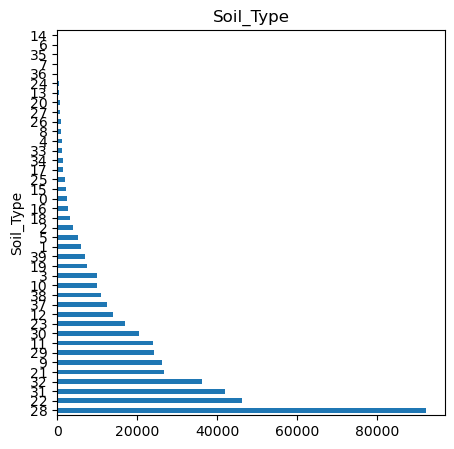

<Figure size 640x480 with 0 Axes>

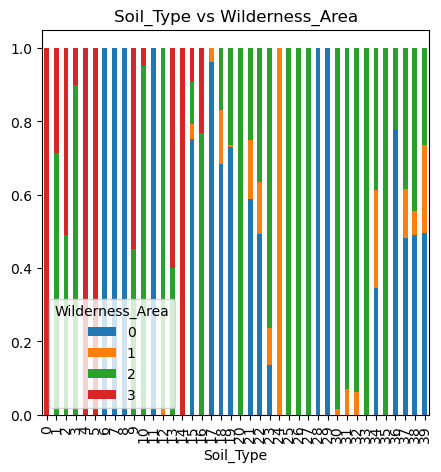

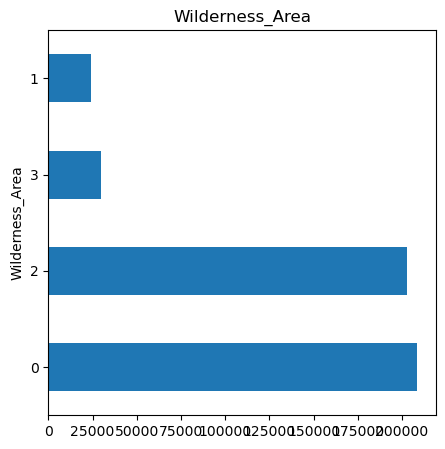

In [4]:
# Descomente as linhas seguintes para ver a análise exploratória, ou
# descomente apenas as partes de seu interesse.

analise_descritiva_preliminar(data)
visualizacao_preliminar(data)
visualizacao_posterior(train_data)

In [ ]:
X_train = train_data.drop(columns=['Cover_Type'])
y_train = train_data['Cover_Type']

X_test = test_data.drop(columns=['Cover_Type'])
y_test = test_data['Cover_Type']

***

# **QUESTÕES**

***Questão 2*** (0.5 pts):

Este dataset é muito grande! Crie um dataset `X_train_small`, `y_train_small` a partir do dataset `X_train`, `y_train` com apenas 20% dos dados.

***Resposta***:

In [ ]:
X_train_small = X_train.sample(frac=0.2, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

print(X_train.shape)
print(y_train.shape)
print(X_train_small.shape)
print(y_train_small.shape)


(464809, 12)
(464809,)
(92962, 12)
(92962,)


***

# **QUESTÕES**

***Questão 3*** (1.0 pt):

Construa uma pipeline preditiva que contém os seguintes passos:

- **preprocessamento**:

    - **variáveis numéricas**:

        - `SimpleImputer(strategy='mean')`

        - `StandardScaler()`

    - **variáveis categóricas**:

        - `SimpleImputer(strategy='most_frequent')`

        - `OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')`

- **classificador**:

    - `HistGradientBoostingClassifier(random_state=42)`

***Resposta***:

In [17]:
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='category').columns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

model = HistGradientBoostingClassifier(random_state=42)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

***

# **QUESTÕES**

***Questão 4*** (1.0 pt):

Use `GridSearchCV` para executar a seleção de hiperparâmetros para o modelo acima, juntamente com a comparação com dois outros modelos:

- O modelo *trivial*: `DummyClassifier(strategy='most_frequent')`

- O modelo *simples*: `SGDClassifier(random_state=42, alpha=0.001)`

Para o modelo trivial e o modelo simples não faremos seleção de hiperparâmetros (mas em um caso real deveríamos fazer sim).

Para o modelo `HistGradientBoostingClassifier` faça a seleção de hiperparâmetros com as seguintes opções:

- Para o hiperparâmetro `max_iter` do classificador, teste as opções `[10, 100, 200]`

- Para o hiperparâmetro `max_depth` do classificador, teste as opções `[10, 20, None]`

***Resposta***:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train_small, y_train_small)

simple_model = SGDClassifier(random_state=42, alpha=0.001)
simple_model.fit(X_train_small, y_train_small)

cv = 3

param_grid = [
    {
        'model__max_iter': [10,100,200],
        'model__max_depth': [10,20,None],
    }
]

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    return_train_score=True,
    scoring='accuracy',
)

grid_search.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hills...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Soil_Type', 'Wilderness_Area'], dtype='object'))])),
                                       ('model',
                                        HistGradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model__max_depth': [10, 20, None],
                          'model__max_iter': [10, 100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [25]:
print(dummy_model.score(X_train_small, y_train_small))
print(simple_model.score(X_train_small, y_train_small))


0.4866074309933091
0.6118091263096749


***

Vamos ver os resultados do grid search:

In [26]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)
param_split_cols = [
    col for col in df.columns if 'param_' in col or (
        ('mean_' in col or 'std_' in col) and 'time' not in col)
]
df.sort_values(by='rank_test_score').loc[:, param_split_cols].round(5)

param_model__max_depth  param_model__max_iter  mean_test_score  \
2                     10                    200          0.86983   
5                     20                    200          0.85768   
1                     10                    100          0.84486   
8                   None                    200          0.84163   
4                     20                    100          0.84100   
7                   None                    100          0.83301   
6                   None                     10          0.76965   
3                     20                     10          0.76965   
0                     10                     10          0.76931   

   std_test_score  mean_train_score  std_train_score  
2         0.00187           0.92847          0.00124  
5         0.02213           0.90863          0.03301  
1         0.00228           0.88892          0.00133  
8         0.02265           0.88405          0.03297  
4         0.01036           0.88303          0.01490  
7         0.01046           0.87132          0.01499  
6         0.00153           0.78191          0.00189  
3         0.00153           0.78191          0.00189  
0         0.00219           0.78206          0.00285

***

# **QUESTÕES**

***Questão 5*** (1.0 pts):

De acordo com os dados acima, o melhor modelo está overfitando? Explique.

***Resposta:***

Apesar de existir uma diferença entre a performance do melhor modelo em dados de treino e teste, a diferença de score médio não é tão expressiva (aproximadamente 6%) para indicar overfitting, da mesma forma, o desvio padrão em ambos os casos é similar.

***

# **QUESTÕES**

***Questão 6*** (1.5 pts):

Para o melhor modelo da questão anterior, responda:

a) (1.0 pt) Qual a acurácia de treino (`X_train`, `y_train` completos) e de teste (`X_test`, `y_test` completos) do modelo? (Requer retreinamento, claro)

b) (0.5 pt) Usando a função `classification_report` (`from sklearn.metrics import classification_report`), qual o *precision* e *recall* da categoria `Douglas-fir`? Este classificador seria bom para identificar todos os locais com alguma chance de ter cobertura por árvores do tipo "Douglas Fir"?

***Resposta***

a) Acurácia de treino: 0.8234 e Acurácia de teste: 0.8196

b) Em árvores do tipo "Douglas Fir", o modelo demonstra 76% de *precision* e 63% de *recall*. Com um recall tão baixo, este modelo não seria bom para identificar todos os locais com cobertura de árvores desse tipo.

In [27]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Soil_Type', 'Wilderness_Area'], dtype='object'))])),
                ('model',
                 HistGradientBoostingClassifier(max_depth=10, max_iter=200,
                                                random_state=42))])

In [31]:
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f'Train accuracy: {train_accuracy:.4f}')

print(f'Test accuracy: {test_accuracy:.4f}')


Train accuracy: 0.8234
Test accuracy: 0.8196


In [33]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data['Cover_Type'].cat.categories))

                   precision    recall  f1-score   support

            Aspen       0.83      0.49      0.62      1898
Cottonwood/Willow       0.69      0.74      0.72       551
      Douglas-fir       0.76      0.63      0.69      3472
        Krummholz       0.89      0.82      0.86      4103
   Lodgepole Pine       0.82      0.86      0.84     56661
   Ponderosa Pine       0.82      0.87      0.84      7148
       Spruce/Fir       0.82      0.78      0.80     42370

         accuracy                           0.82    116203
        macro avg       0.80      0.74      0.77    116203
     weighted avg       0.82      0.82      0.82    116203



***

Agora vamos supor que o problema é detectar se um terreno contém árvores do tipo `Spruce/Fir` ou `Douglas-fir`:

In [34]:
fir_classes = ['Spruce/Fir', 'Douglas-fir']

y_train_binary = y_train.isin(fir_classes)
y_test_binary = y_test.isin(fir_classes)

***

# **QUESTÕES**

***Questão 7*** (3.0 pts)

Para o modelo original (sem ajuste de hiperparâmetros, só para simplificar):

a) (1.0 pt) Treine o modelo no conjunto de treino e obtenha predições de probabilidade de classe positiva (`predict_proba`) no conjunto de teste.

b) (1.0 pt) Mostre a curva precision-recall

c) (1.0 pt) Mostre a curva ROC


***Resposta***

In [38]:
model.fit(X_train, y_train_binary)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Soil_Type', 'Wilderness_Area'], dtype='object'))])),
                ('model', HistGradientBoostingClassifier(random_state=42))])

In [42]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba)


[[0.77153291 0.22846709]
 [0.52695672 0.47304328]
 [0.26970353 0.73029647]
 ...
 [0.19500753 0.80499247]
 [0.62469844 0.37530156]
 [0.86373091 0.13626909]]


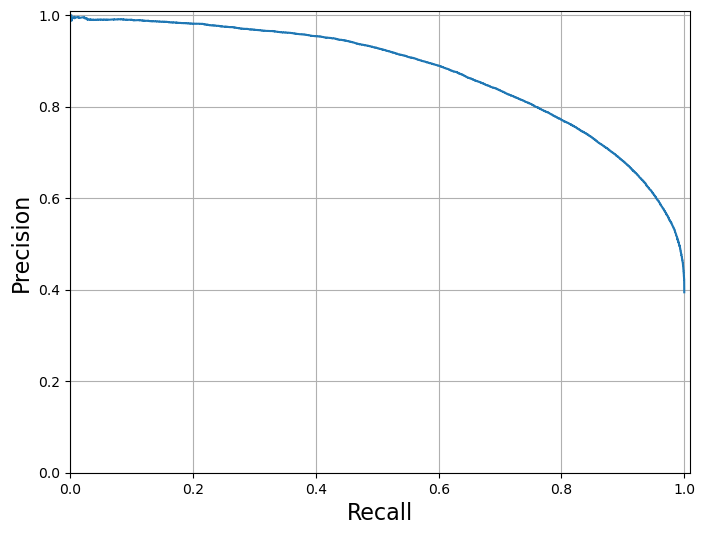

In [59]:
#precision recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba[:,1])

plt.figure(figsize=(8,6))

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.axis([0, 1.01, 0, 1.01])
plt.grid(True)

plt.show()

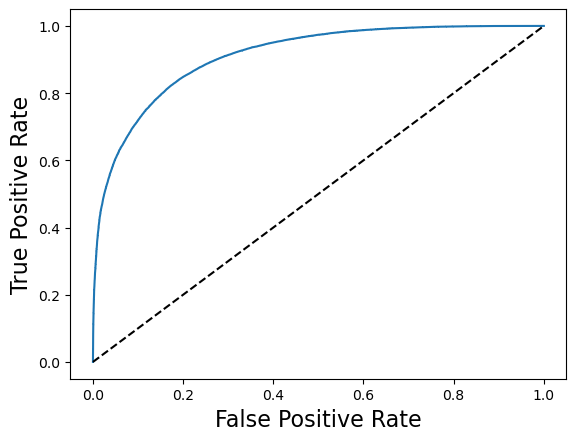

In [47]:
#ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

Boa prova!